In [ ]:
# !pip install geojson shapely
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import groupby
# from shapely import wkt
# from shapely.geometry import mapping
# import geojson

# !gdown 1at_wesMiDjxPdIc2aWFkU4KfvrSo5Ady
df = pd.read_csv('Electric_Vehicle_Data.csv')
df['Vote'] = 1

df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1at_wesMiDjxPdIc2aWFkU4KfvrSo5Ady
From (redirected): https://drive.google.com/uc?id=1at_wesMiDjxPdIc2aWFkU4KfvrSo5Ady&confirm=t&uuid=1a786875-4b3e-46e0-9a29-91563b7ea00f
To: /content/Electric_Vehicle_Data.csv
100% 44.1M/44.1M [00:01<00:00, 33.7MB/s]


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vote
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10,1
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10,1
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10,1
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10,1


In [ ]:
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vote
count,181458,181455,181455,181458,181455.000000,181458.000000,181458,181458,181458,181458,181458.000000,181458.000000,181060.000000,1.814580e+05,181450,181455,1.814550e+05,181458.0
unique,11060,193,726,44,NaN,NaN,40,143,2,3,NaN,NaN,NaN,NaN,870,76,NaN,NaN
top,7SAYGDEE6P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN,NaN
freq,1244,94460,30045,181060,NaN,NaN,80819,37007,141973,94730,NaN,NaN,NaN,NaN,4637,67180,NaN,NaN
mean,NaN,NaN,NaN,NaN,98174.050718,2020.581793,NaN,NaN,NaN,NaN,57.826665,1040.236749,29.106904,2.214128e+08,NaN,NaN,5.297575e+10,1.0
std,NaN,NaN,NaN,NaN,2414.241968,2.991140,NaN,NaN,NaN,NaN,91.396074,8228.989085,14.892342,7.528561e+07,NaN,NaN,1.594876e+09,0.0
min,NaN,NaN,NaN,NaN,1545.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,1.001020e+09,1.0
25%,NaN,NaN,NaN,NaN,98052.000000,2019.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.830687e+08,NaN,NaN,5.303301e+10,1.0
50%,NaN,NaN,NaN,NaN,98122.000000,2022.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,33.000000,2.289155e+08,NaN,NaN,5.303303e+10,1.0
75%,NaN,NaN,NaN,NaN,98370.000000,2023.000000,NaN,NaN,NaN,NaN,75.000000,0.000000,42.000000,2.561320e+08,NaN,NaN,5.305307e+10,1.0


In [ ]:
# Convert columns to Text datatype
text_columns = [
    'VIN (1-10)', 'County', 'City', 'State',
    'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'DOL Vehicle ID', 'Electric Utility']

df[text_columns] = df[text_columns].astype(str)

# Convert columns to Number datatype
number_columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'Vote', '2020 Census Tract']
df[number_columns] = df[number_columns].apply(pd.to_numeric, errors='coerce')
# Handle NaN values by replacing them with a default value, e.g., 0
# Adjust the default value as needed for your dataset
df[number_columns] = df[number_columns].fillna(0).astype(int)

# # Convert Vehicle Location from WKT to GeoJSON
# def wkt_to_geojson(wkt_str):
#     # try:
#     # point =
#     return geojson.dumps(mapping(wkt.loads(wkt_str)))
#     # except Exception as e:
#         # return None

# df['Vehicle Location'] = df['Vehicle Location'].apply(wkt_to_geojson)

df.replace('nan', pd.NA, inplace=True)

df.rename(columns={'Make':'Maker'}, inplace=True)


# # Define a function to get the first 3 words from a text
# def get_first_n_segments(text, n=3):
#     # Replace all occurrences of ' || ', ' | ', and split by spaces
#     standardized_text = text.replace('||', ';').replace('|', ';')
#     words = standardized_text.split()  # Split the text into words
#     # return ' '.join(words[:n])  # Join the first n words
#     return standardized_text

# df = df.dropna()
# df['Electric Utility'] = df['Electric Utility'].apply(lambda x: get_first_n_segments(x))

In [ ]:
# 3. Number of Unique Values
unique_counts = df.nunique()
print("Number of unique values per column:")
print(unique_counts)
print(df.info())

Number of unique values per column:
VIN (1-10)                                            11060
County                                                  193
City                                                    726
State                                                    44
Postal Code                                             872
Model Year                                               22
Maker                                                    40
Model                                                   143
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          103
Base MSRP                                                31
Legislative District                                     50
DOL Vehicle ID                                       181458
Vehicle Location                                        870
Electric Utility                                         76
2020

In [ ]:
# Define a function to get the first 3 words from a text
def get_first_n_segments(text, n=3):
    # Replace all occurrences of ' || ', ' | ', and split by spaces
    standardized_text = text.replace('||', ';').replace('|', ';')
    words = standardized_text.split()  # Split the text into words
    # return ' '.join(words[:n])  # Join the first n words
    return standardized_text


# Filter out rows where 'State' is 'WA'
df2 = df[df['State'] != 'WA'].drop(columns=['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract', 'Legislative District']).dropna()
df3 = df[df['State'] == 'WA'].drop(columns=['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'])

df2['State'] = 'ELSE'

df2['Electric Utility'] = df2['Electric Utility'].apply(lambda x: get_first_n_segments(x))
df3['Electric Utility'] = df3['Electric Utility'].apply(lambda x: get_first_n_segments(x))

# Function to normalize the DataFrame by splitting the values
def normalize_dataframe(df, column, delimiter=';'):
    # Explode the column into separate rows
    df_expanded = df.copy()
    df_expanded[column] = df_expanded[column].str.split(delimiter)
    df_expanded = df_expanded.explode(column)
    return df_expanded

# df4 = normalize_dataframe(df3, 'Electric Utility Short')

# Apply transformations directly in a single line
df4 = normalize_dataframe(df3.assign(**{'Electric Utility Indiv': df3['Electric Utility']}), 'Electric Utility Indiv')
df4.drop(columns=['Electric Utility'], inplace=True)


Number of unique values per column:
County                                               159
City                                                 265
State                                                  1
Postal Code                                          328
Model Year                                            13
Maker                                                 26
Model                                                 63
Electric Vehicle Type                                  2
Clean Alternative Fuel Vehicle (CAFV) Eligibility      3
Electric Range                                        54
Base MSRP                                              9
Electric Utility                                       1
Vote                                                   1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 75359 to 181324
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------             

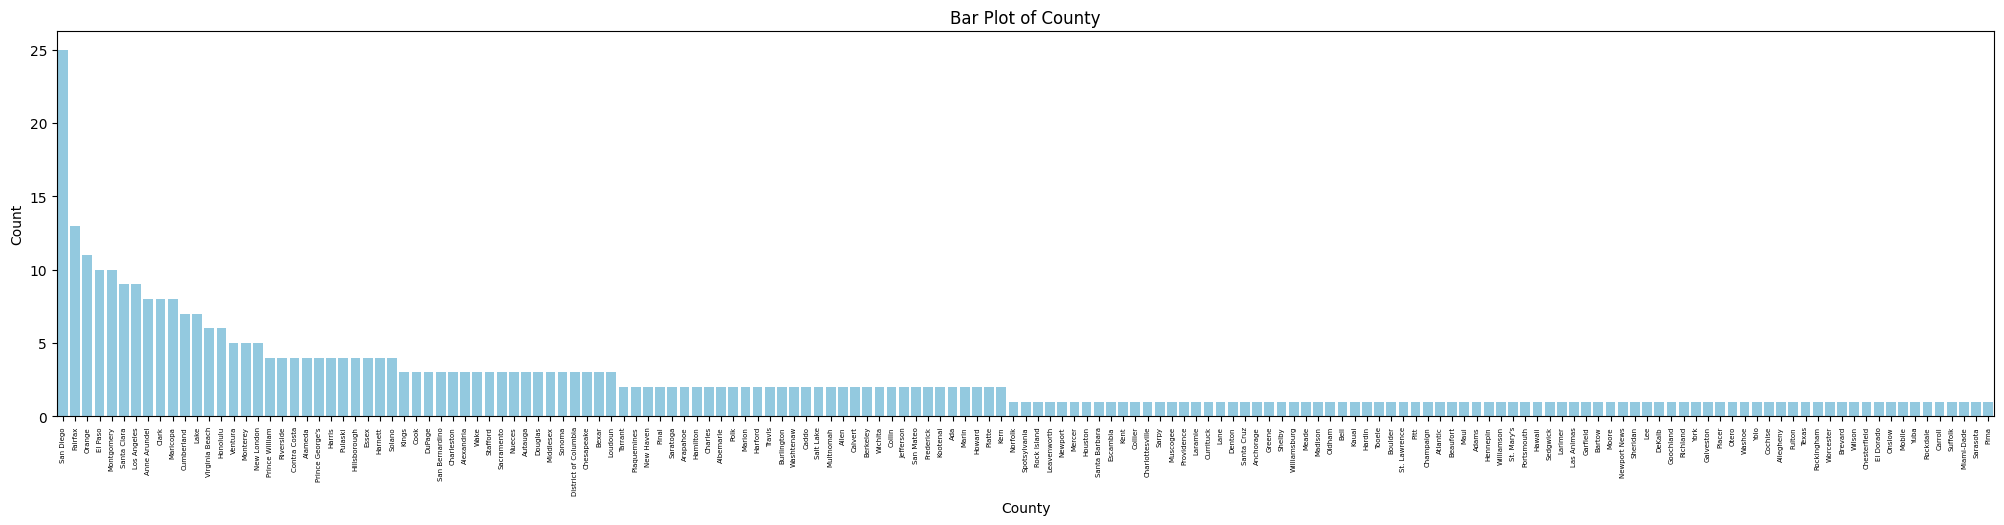


Frequency of values in 'County' (Ascending):
County
Spotsylvania     1
Williamsburg     1
Meade            1
Madison          1
Oldham           1
                ..
Montgomery      10
El Paso         10
Orange          11
Fairfax         13
San Diego       25
Name: count, Length: 159, dtype: int64

Frequency of values in 'County' (Descending):
County
San Diego       25
Fairfax         13
Orange          11
El Paso         10
Montgomery      10
                ..
Madison          1
Meade            1
Williamsburg     1
Shelby           1
Pima             1
Name: count, Length: 159, dtype: int64

count           395
unique          159
top       San Diego
freq             25
Name: County, dtype: object
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: County
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None



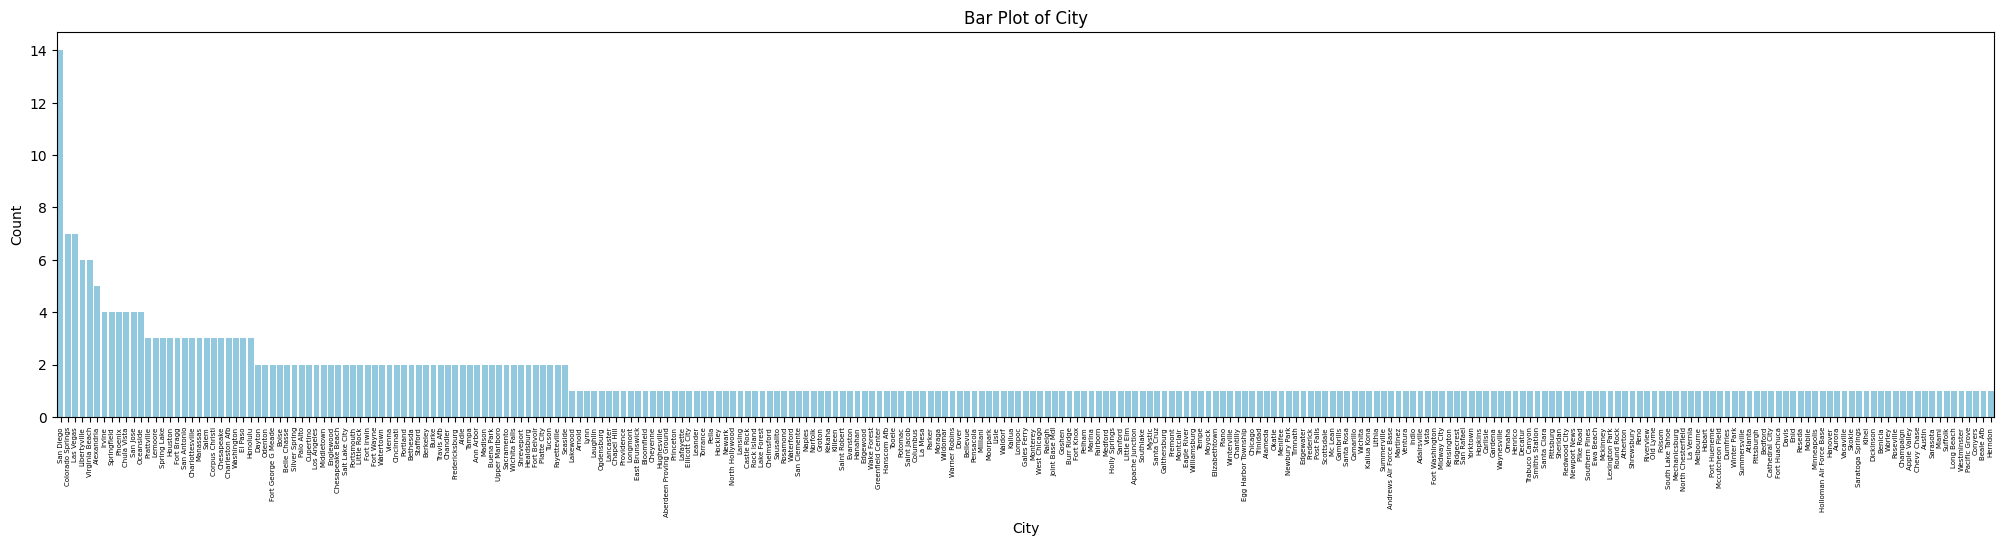


Frequency of values in 'City' (Ascending):
City
Gales Ferry          1
Menifee              1
Newbury Park         1
Timnath              1
Edgewater            1
                    ..
Virginia Beach       6
Libertyville         6
Las Vegas            7
Colorado Springs     7
San Diego           14
Name: count, Length: 265, dtype: int64

Frequency of values in 'City' (Descending):
City
San Diego           14
Las Vegas            7
Colorado Springs     7
Libertyville         6
Virginia Beach       6
                    ..
Joint Base Mdl       1
Goshen               1
Burr Ridge           1
Fort Knox            1
Herndon              1
Name: count, Length: 265, dtype: int64

count           395
unique          265
top       San Diego
freq             14
Name: City, dtype: object
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None



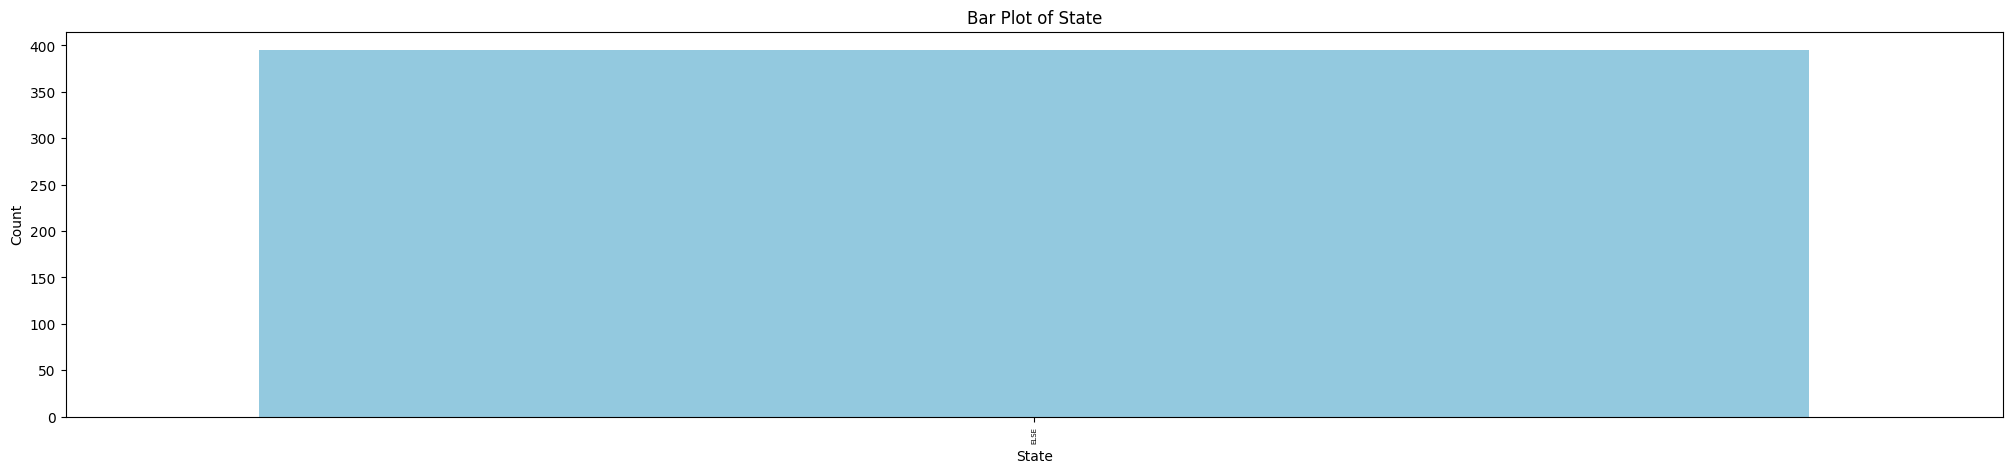


Frequency of values in 'State' (Ascending):
State
ELSE    395
Name: count, dtype: int64

Frequency of values in 'State' (Descending):
State
ELSE    395
Name: count, dtype: int64

count      395
unique       1
top       ELSE
freq       395
Name: State, dtype: object
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: State
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None



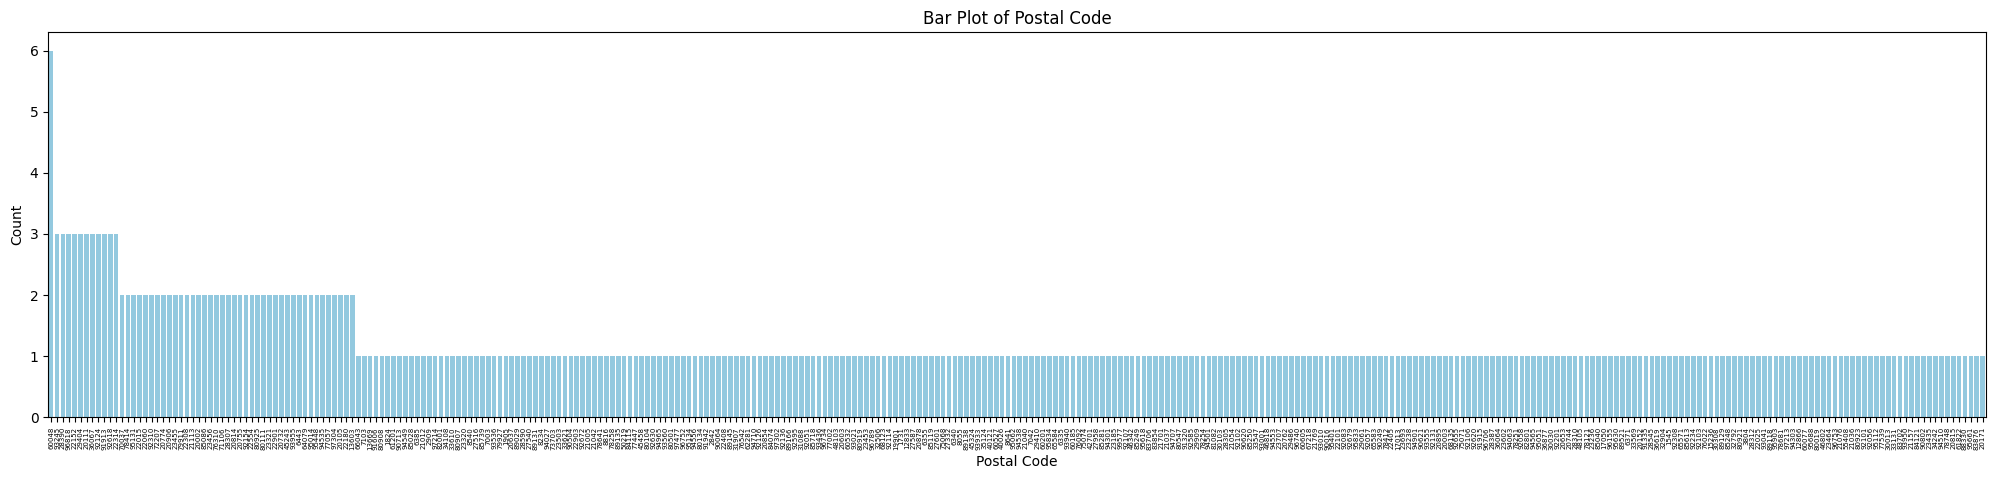


Frequency of values in 'Postal Code' (Ascending):
Postal Code
95062    1
29061    1
95833    1
92679    1
92083    1
        ..
92124    3
92618    3
22314    3
20111    3
60048    6
Name: count, Length: 328, dtype: int64

Frequency of values in 'Postal Code' (Descending):
Postal Code
60048    6
36067    3
93245    3
22314    3
91913    3
        ..
6355     1
85119    1
27601    1
75068    1
20171    1
Name: count, Length: 328, dtype: int64

count      395.000000
mean     58488.025316
std      32550.262707
min       1545.000000
25%      23279.000000
50%      68135.000000
75%      92057.500000
max      99577.000000
Name: Postal Code, dtype: float64
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Postal Code
Non-Null Count  Dtype
--------------  -----
395 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB
None



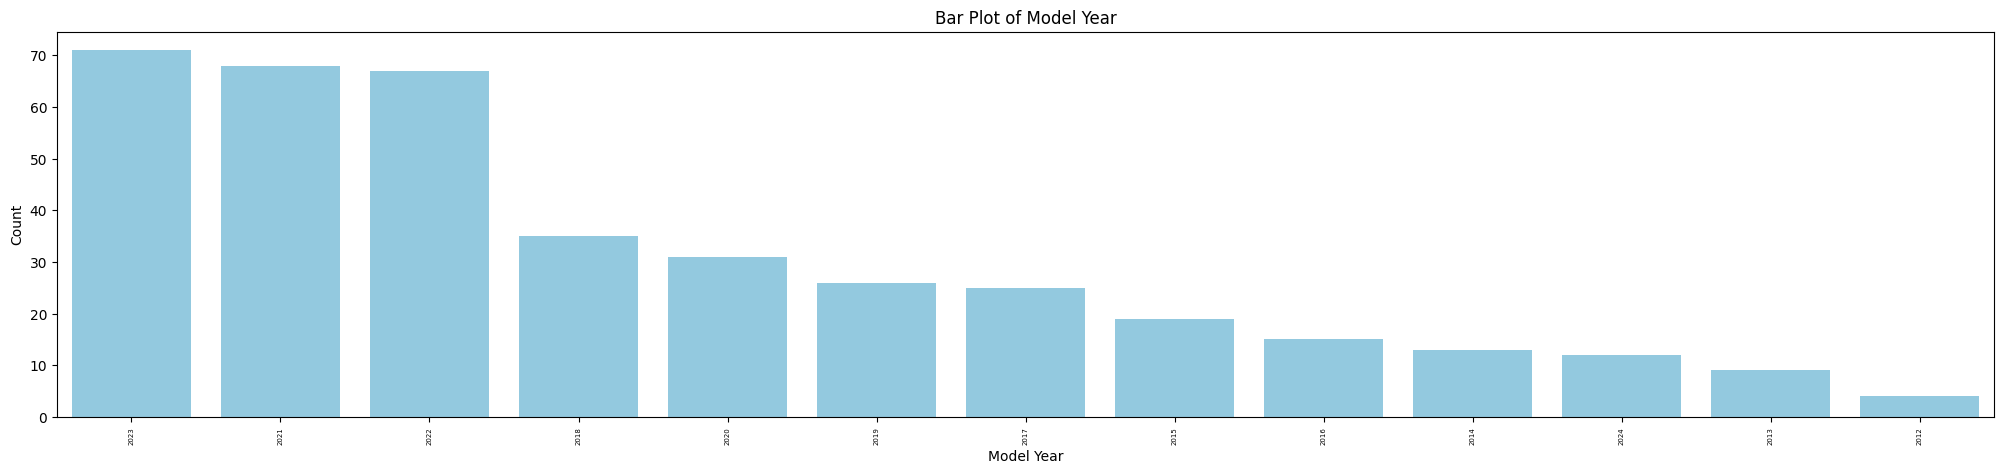


Frequency of values in 'Model Year' (Ascending):
Model Year
2012     4
2013     9
2024    12
2014    13
2016    15
2015    19
2017    25
2019    26
2020    31
2018    35
2022    67
2021    68
2023    71
Name: count, dtype: int64

Frequency of values in 'Model Year' (Descending):
Model Year
2023    71
2021    68
2022    67
2018    35
2020    31
2019    26
2017    25
2015    19
2016    15
2014    13
2024    12
2013     9
2012     4
Name: count, dtype: int64

count     395.000000
mean     2019.908861
std         2.952552
min      2012.000000
25%      2018.000000
50%      2021.000000
75%      2022.000000
max      2024.000000
Name: Model Year, dtype: float64
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Model Year
Non-Null Count  Dtype
--------------  -----
395 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB
None



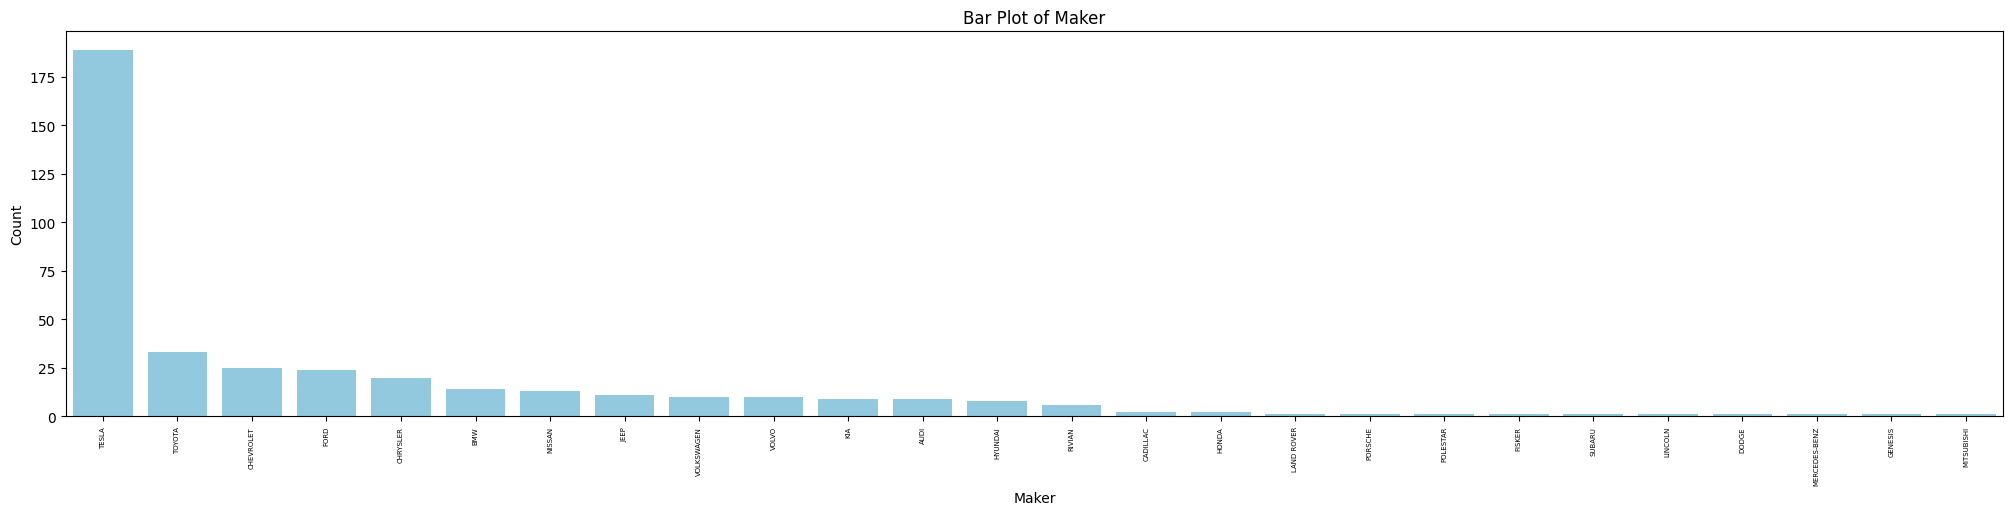


Frequency of values in 'Maker' (Ascending):
Maker
MITSUBISHI         1
MERCEDES-BENZ      1
DODGE              1
LINCOLN            1
SUBARU             1
FISKER             1
POLESTAR           1
PORSCHE            1
LAND ROVER         1
GENESIS            1
HONDA              2
CADILLAC           2
RIVIAN             6
HYUNDAI            8
KIA                9
AUDI               9
VOLVO             10
VOLKSWAGEN        10
JEEP              11
NISSAN            13
BMW               14
CHRYSLER          20
FORD              24
CHEVROLET         25
TOYOTA            33
TESLA            189
Name: count, dtype: int64

Frequency of values in 'Maker' (Descending):
Maker
TESLA            189
TOYOTA            33
CHEVROLET         25
FORD              24
CHRYSLER          20
BMW               14
NISSAN            13
JEEP              11
VOLKSWAGEN        10
VOLVO             10
KIA                9
AUDI               9
HYUNDAI            8
RIVIAN             6
CADILLAC           2
HONDA     

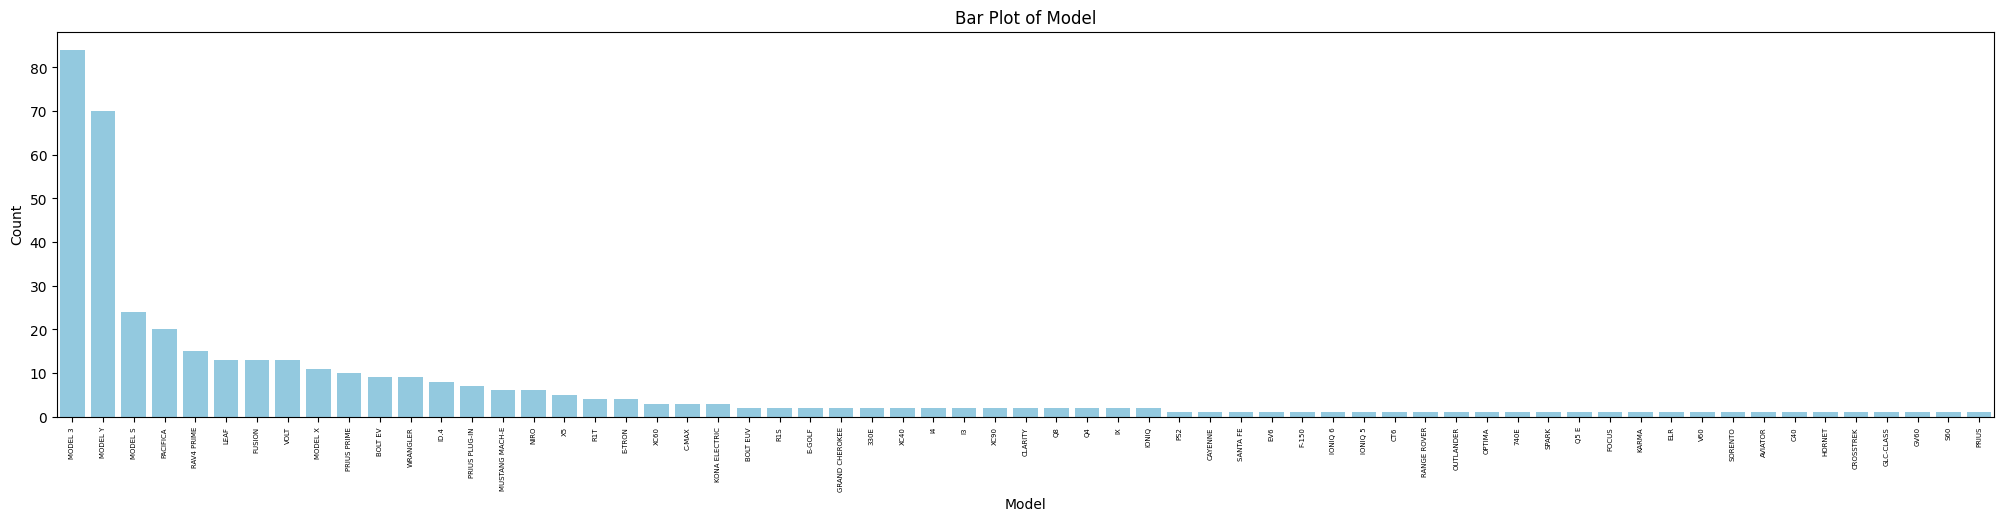


Frequency of values in 'Model' (Ascending):
Model
PRIUS          1
PS2            1
CAYENNE        1
SANTA FE       1
EV6            1
              ..
RAV4 PRIME    15
PACIFICA      20
MODEL S       24
MODEL Y       70
MODEL 3       84
Name: count, Length: 63, dtype: int64

Frequency of values in 'Model' (Descending):
Model
MODEL 3       84
MODEL Y       70
MODEL S       24
PACIFICA      20
RAV4 PRIME    15
              ..
EV6            1
SANTA FE       1
CAYENNE        1
PS2            1
PRIUS          1
Name: count, Length: 63, dtype: int64

count         395
unique         63
top       MODEL 3
freq           84
Name: Model, dtype: object
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None



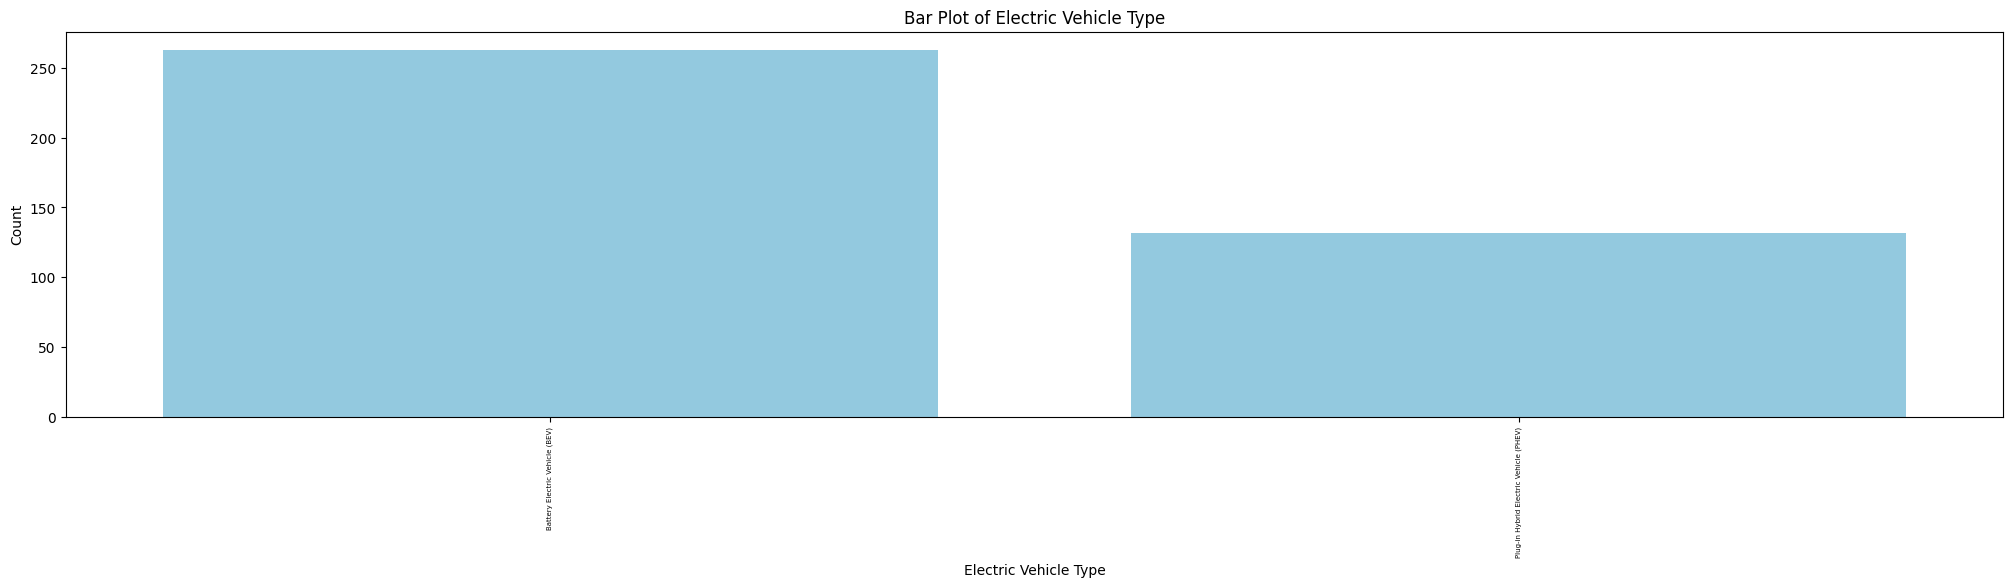


Frequency of values in 'Electric Vehicle Type' (Ascending):
Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)    132
Battery Electric Vehicle (BEV)            263
Name: count, dtype: int64

Frequency of values in 'Electric Vehicle Type' (Descending):
Electric Vehicle Type
Battery Electric Vehicle (BEV)            263
Plug-in Hybrid Electric Vehicle (PHEV)    132
Name: count, dtype: int64

count                                395
unique                                 2
top       Battery Electric Vehicle (BEV)
freq                                 263
Name: Electric Vehicle Type, dtype: object
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Electric Vehicle Type
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None



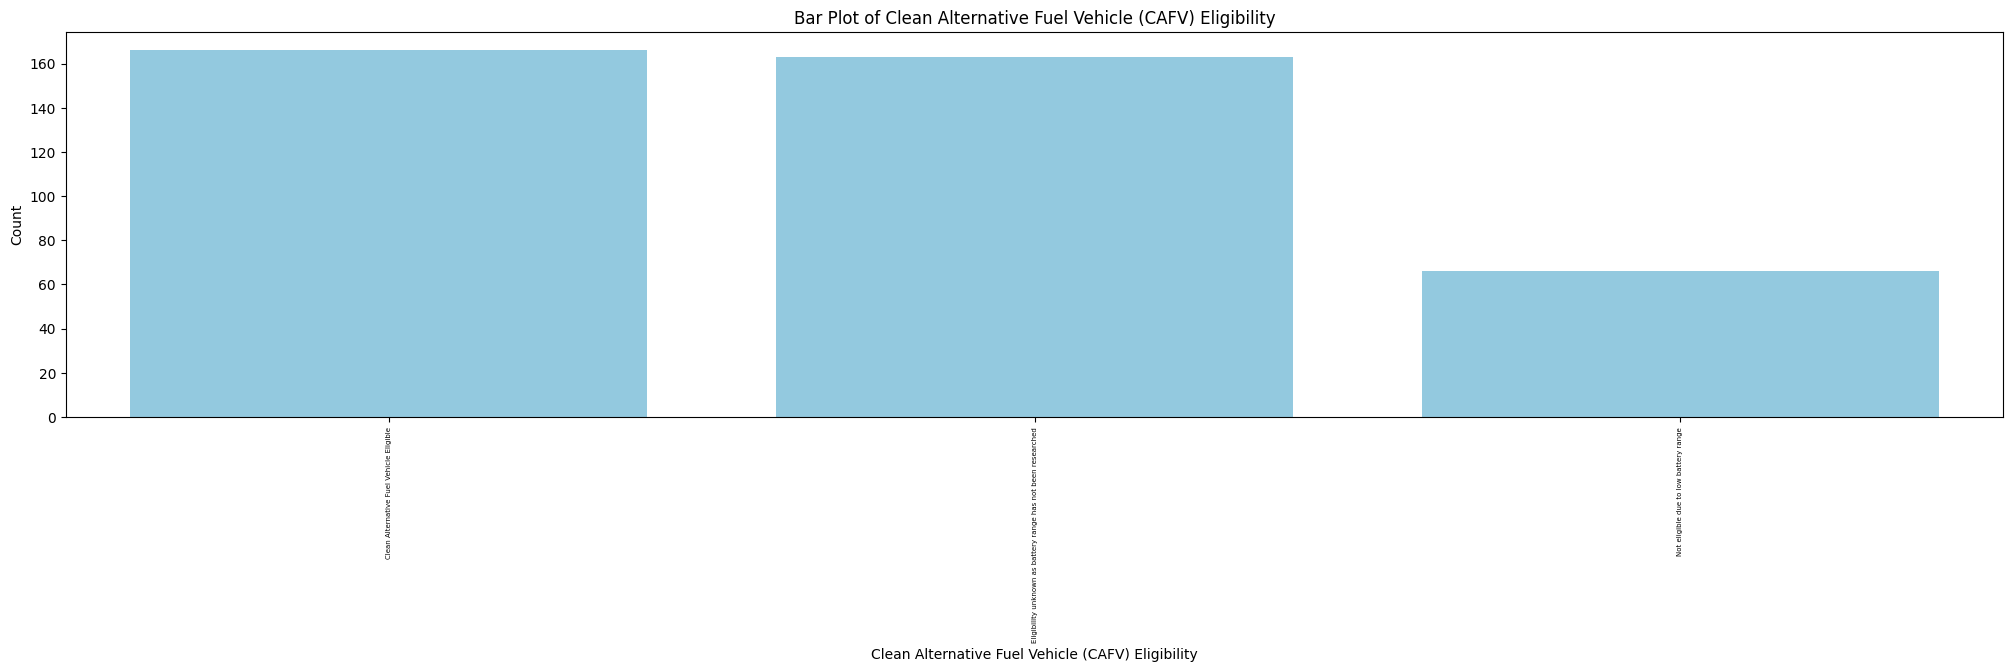


Frequency of values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' (Ascending):
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Not eligible due to low battery range                            66
Eligibility unknown as battery range has not been researched    163
Clean Alternative Fuel Vehicle Eligible                         166
Name: count, dtype: int64

Frequency of values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' (Descending):
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         166
Eligibility unknown as battery range has not been researched    163
Not eligible due to low battery range                            66
Name: count, dtype: int64

count                                         395
unique                                          3
top       Clean Alternative Fuel Vehicle Eligible
freq                                          166
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dty

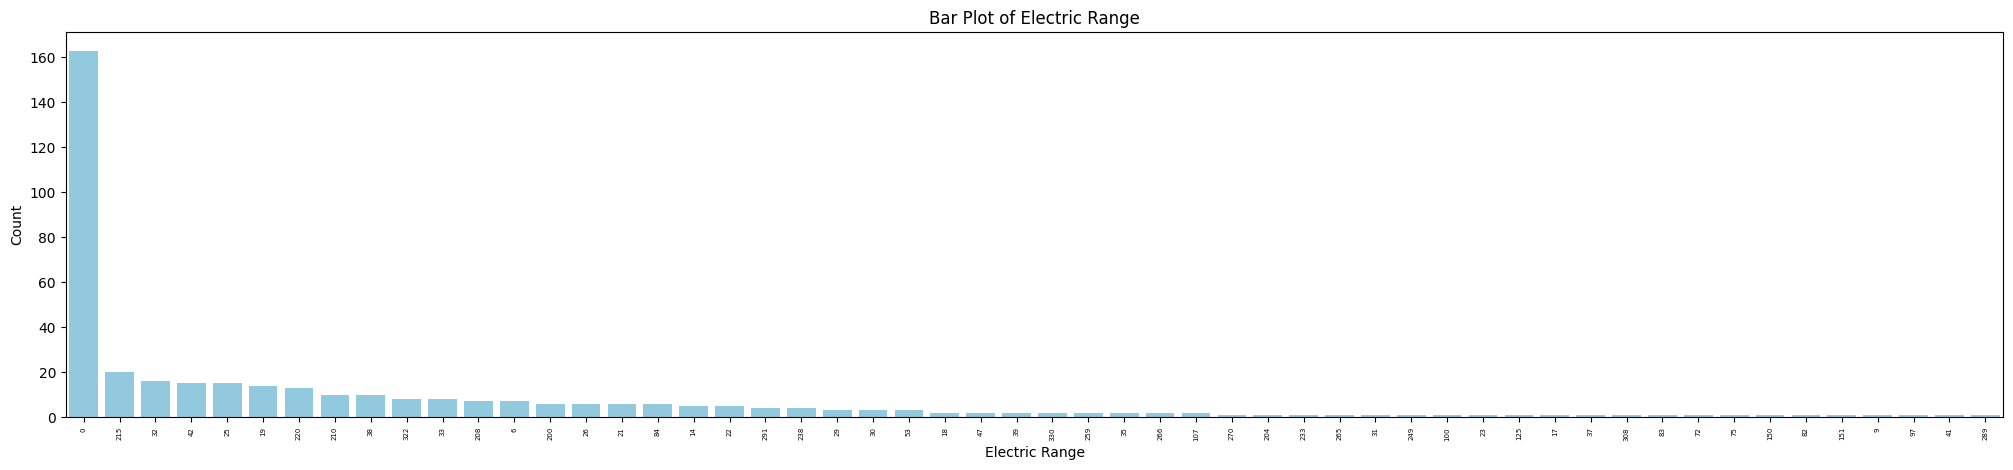


Frequency of values in 'Electric Range' (Ascending):
Electric Range
289      1
270      1
204      1
233      1
265      1
31       1
249      1
100      1
125      1
17       1
23       1
308      1
83       1
72       1
75       1
150      1
82       1
151      1
9        1
97       1
37       1
41       1
330      2
107      2
266      2
35       2
259      2
39       2
18       2
47       2
53       3
30       3
29       3
238      4
291      4
22       5
14       5
84       6
21       6
26       6
200      6
6        7
208      7
33       8
322      8
38      10
210     10
220     13
19      14
25      15
42      15
32      16
215     20
0      163
Name: count, dtype: int64

Frequency of values in 'Electric Range' (Descending):
Electric Range
0      163
215     20
32      16
42      15
25      15
19      14
220     13
210     10
38      10
322      8
33       8
208      7
6        7
84       6
21       6
200      6
26       6
14       5
22       5
291      4
238      4
29       3

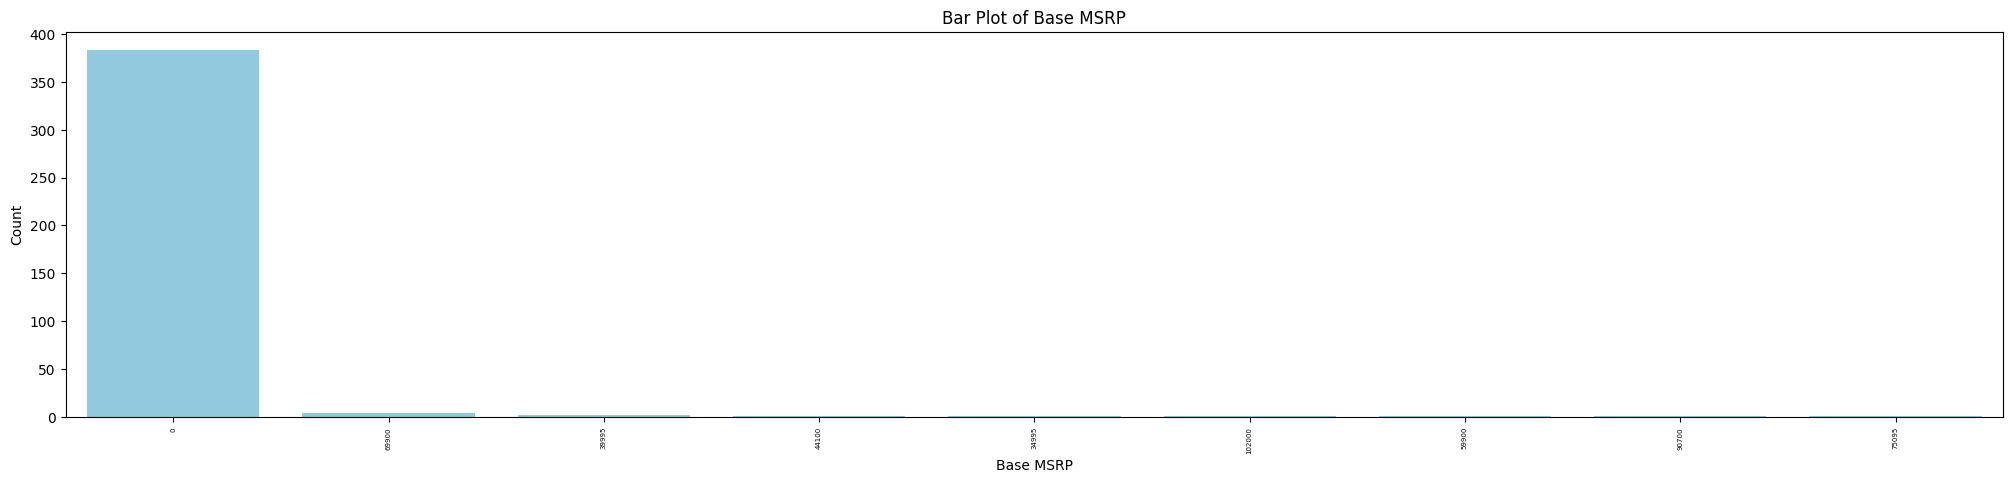


Frequency of values in 'Base MSRP' (Ascending):
Base MSRP
44100       1
34995       1
102000      1
59900       1
90700       1
75095       1
39995       2
69900       4
0         383
Name: count, dtype: int64

Frequency of values in 'Base MSRP' (Descending):
Base MSRP
0         383
69900       4
39995       2
44100       1
34995       1
102000      1
59900       1
90700       1
75095       1
Name: count, dtype: int64

count       395.000000
mean       1940.202532
std       11519.518493
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      102000.000000
Name: Base MSRP, dtype: float64
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Base MSRP
Non-Null Count  Dtype
--------------  -----
395 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB
None



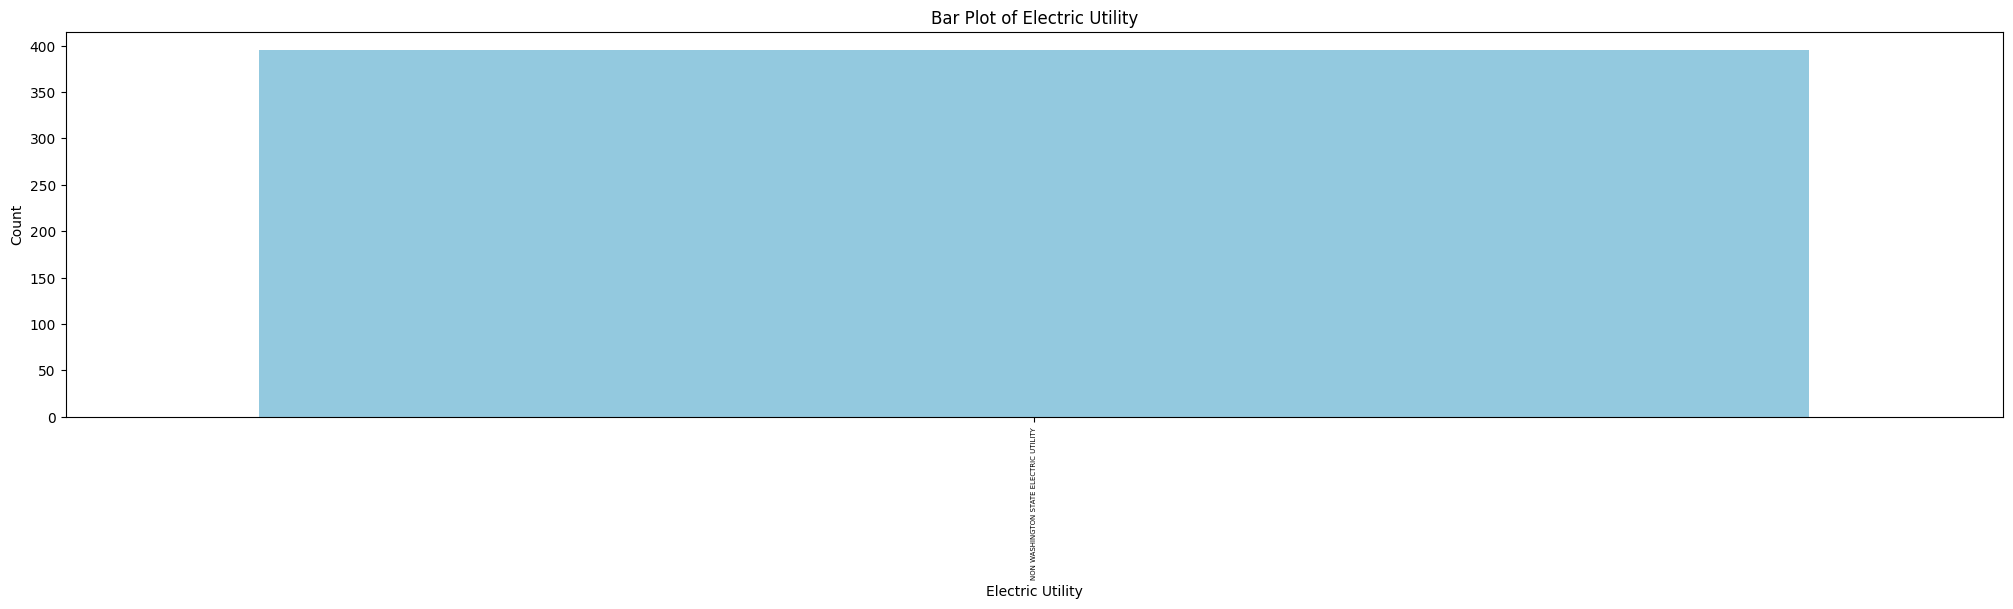


Frequency of values in 'Electric Utility' (Ascending):
Electric Utility
NON WASHINGTON STATE ELECTRIC UTILITY    395
Name: count, dtype: int64

Frequency of values in 'Electric Utility' (Descending):
Electric Utility
NON WASHINGTON STATE ELECTRIC UTILITY    395
Name: count, dtype: int64

count                                       395
unique                                        1
top       NON WASHINGTON STATE ELECTRIC UTILITY
freq                                        395
Name: Electric Utility, dtype: object
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Electric Utility
Non-Null Count  Dtype 
--------------  ----- 
395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None



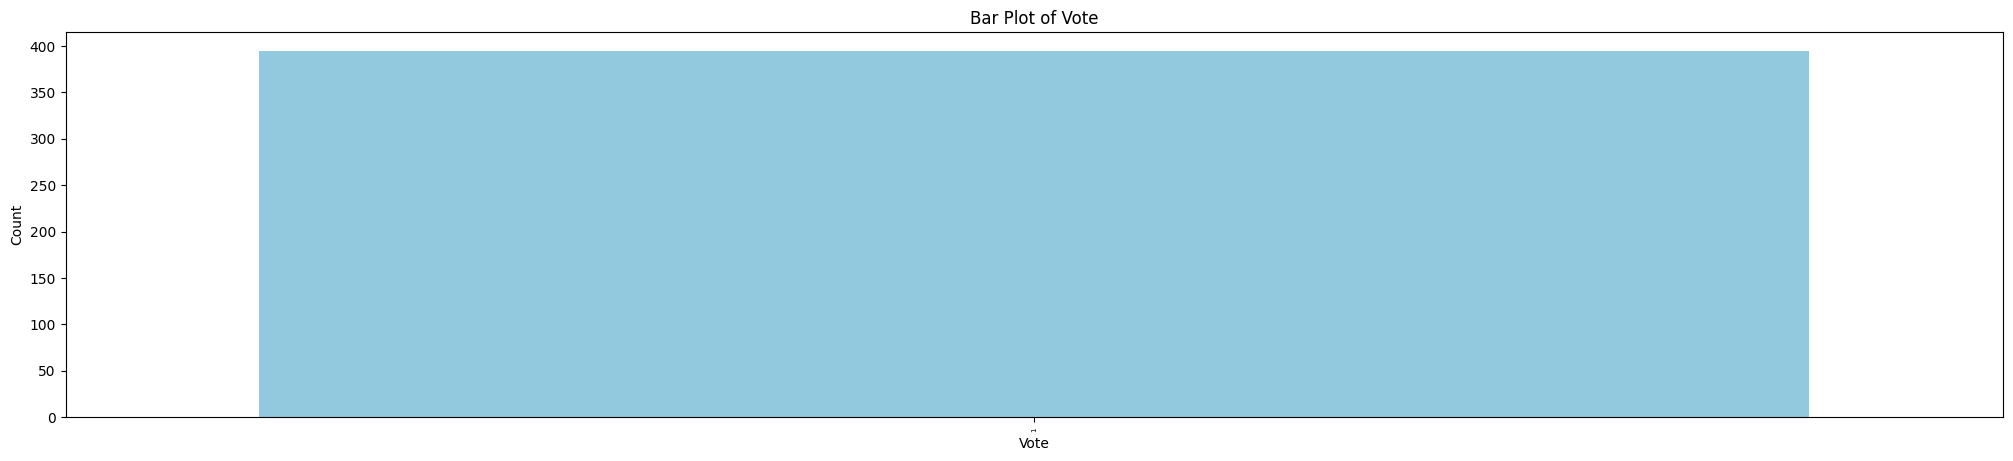


Frequency of values in 'Vote' (Ascending):
Vote
1    395
Name: count, dtype: int64

Frequency of values in 'Vote' (Descending):
Vote
1    395
Name: count, dtype: int64

count    395.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Vote, dtype: float64
<class 'pandas.core.series.Series'>
Index: 395 entries, 75359 to 181324
Series name: Vote
Non-Null Count  Dtype
--------------  -----
395 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB
None



In [ ]:
# 3. Number of Unique Values
unique_counts2 = df2.nunique()
print("Number of unique values per column:")
print(unique_counts2)
print(df2.info())
print(df2.describe(include='all'))


# # 2. Count Graph for Non-Numeric Data (including NA values)
# # for column in df.columns:
for column in df2.columns:
#     # if not pd.api.types.is_numeric_dtype(df2[column]):
#     else:
    plt.figure(figsize=(25, 5))
    # print(column, df2[column].unique().astype(str))
    # Count plot for categorical data including NA values
    df2[column] = df2[column].fillna(pd.NA)
    sns.countplot(x=df2[column], color='skyblue', order=df2[column].value_counts().index)
    # sns.countplot(x=df2[column], color='skyblue', order=sorted(df2[column].unique().astype(str)))
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=5)
    # plt.tight_layout()
    plt.show()

# 4. Frequency Table (Ascending Order) including NA
# 5. Frequency Table (Descending Order) including NA
# for column in df2.columns:
    # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
    frequency_table = df2[column].value_counts(dropna=False).sort_values(ascending=True)
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Ascending):")
    print(frequency_table)
    frequency_table = df2[column].value_counts(dropna=False).sort_values(ascending=False)
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Descending):")
    print(frequency_table)
    print()
    print(df2[column].describe(include='all'))
    print(df2[column].info())
    print()

Number of unique values per column:
County                                                39
City                                                 468
State                                                  1
Postal Code                                          543
Model Year                                            22
Maker                                                 40
Model                                                143
Electric Vehicle Type                                  2
Clean Alternative Fuel Vehicle (CAFV) Eligibility      3
Electric Range                                       103
Base MSRP                                             31
Legislative District                                  49
Electric Utility                                      75
Vote                                                   1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 181060 entries, 0 to 181457
Data columns (total 14 columns):
 #   Column                                    

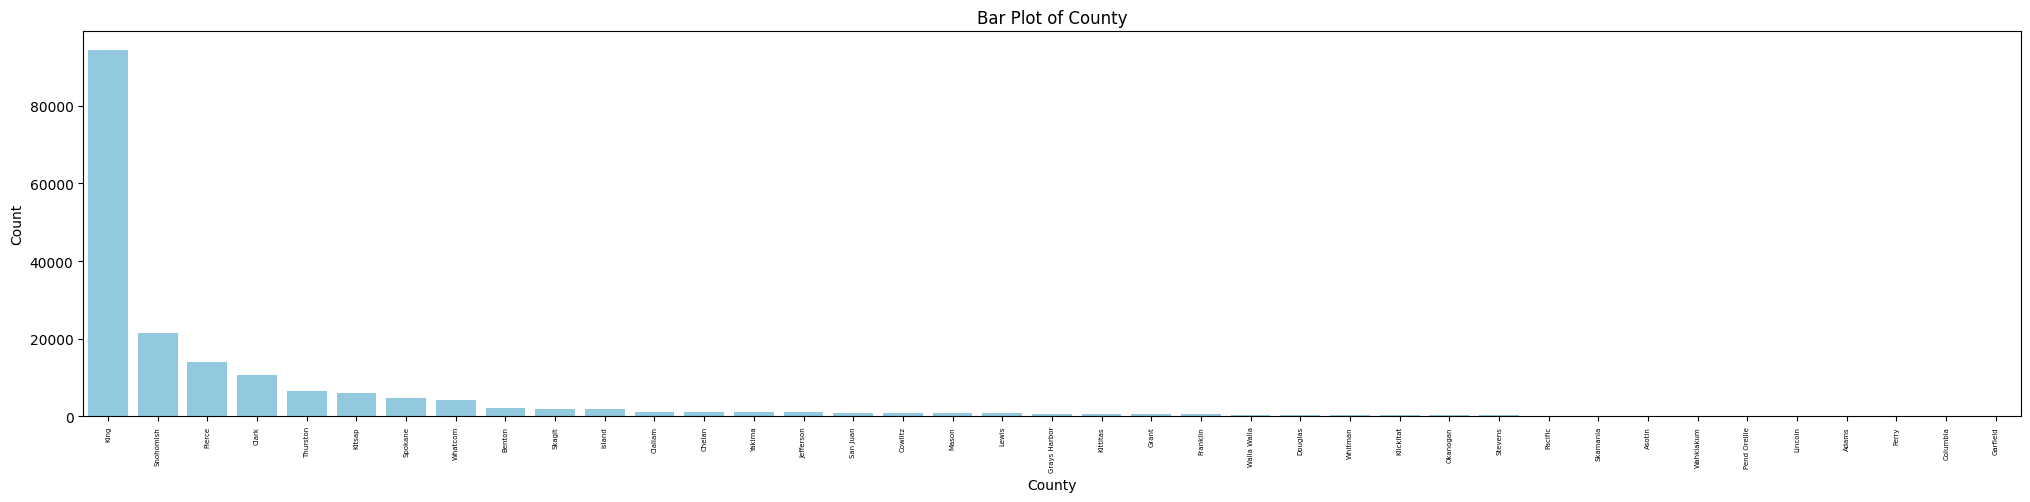


Frequency of values in 'County' (Ascending):
County
Garfield            3
Columbia           16
Ferry              30
Adams              51
Lincoln            52
Pend Oreille       56
Wahkiakum          61
Asotin             74
Skamania          196
Pacific           209
Stevens           223
Okanogan          272
Klickitat         294
Whitman           341
Douglas           369
Walla Walla       439
Franklin          585
Grant             585
Kittitas          643
Grays Harbor      648
Lewis             767
Mason             840
Cowlitz           935
San Juan          947
Jefferson         994
Yakima           1034
Chelan           1078
Clallam          1079
Island           1921
Skagit           1968
Benton           2183
Whatcom          4331
Spokane          4671
Kitsap           5956
Thurston         6600
Clark           10667
Pierce          14043
Snohomish       21439
King            94460
Name: count, dtype: int64

Frequency of values in 'County' (Descending):
County
King     

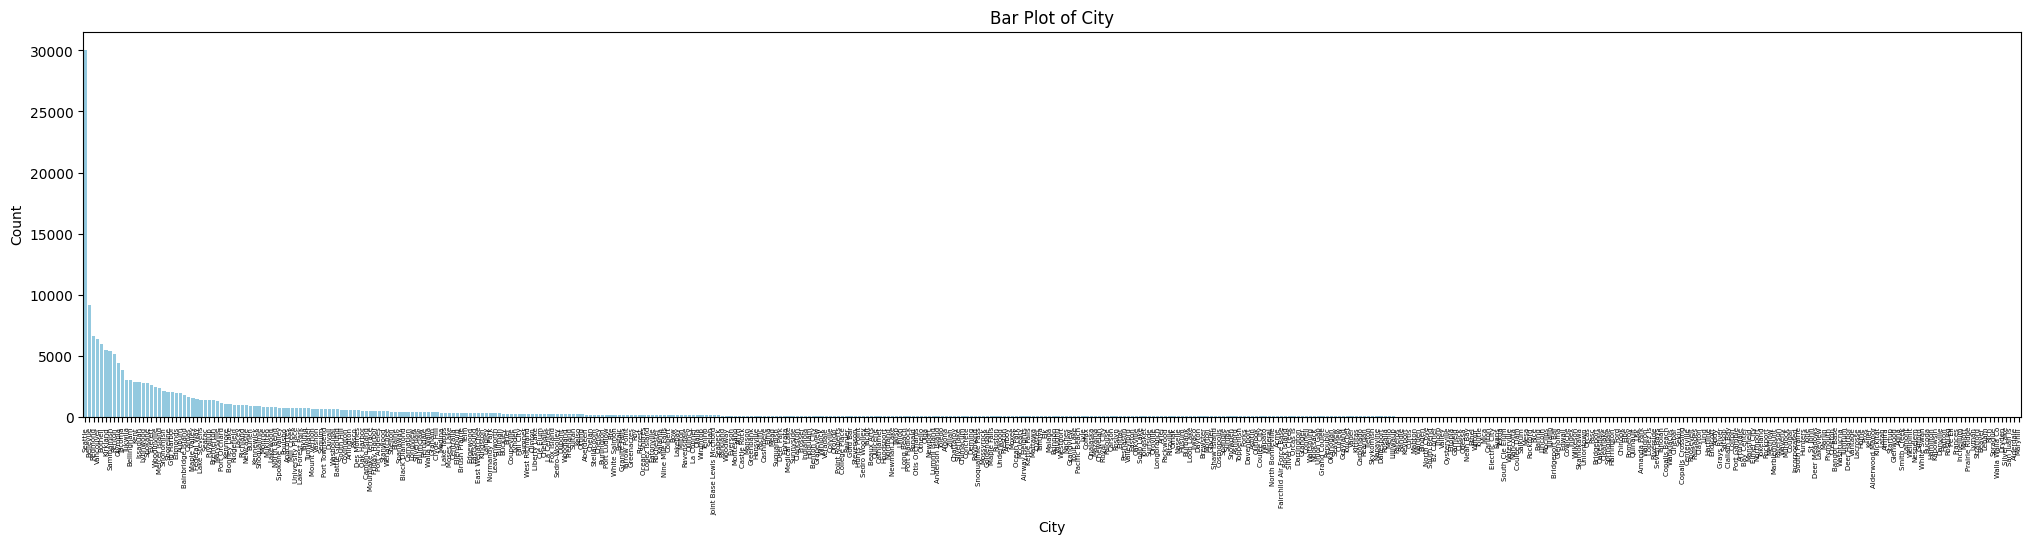


Frequency of values in 'City' (Ascending):
City
Maryhill           1
Lamont             1
Smith Creek        1
Adna               1
Glenwood           1
               ...  
Bothell         5961
Vancouver       6329
Redmond         6568
Bellevue        9116
Seattle        30045
Name: count, Length: 468, dtype: int64

Frequency of values in 'City' (Descending):
City
Seattle        30045
Bellevue        9116
Redmond         6568
Vancouver       6329
Bothell         5961
               ...  
Adna               1
Smith Creek        1
Lamont             1
Wellpinit          1
Maryhill           1
Name: count, Length: 468, dtype: int64

count      181060
unique        468
top       Seattle
freq        30045
Name: City, dtype: object
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: City
Non-Null Count   Dtype 
--------------   ----- 
181060 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB
None



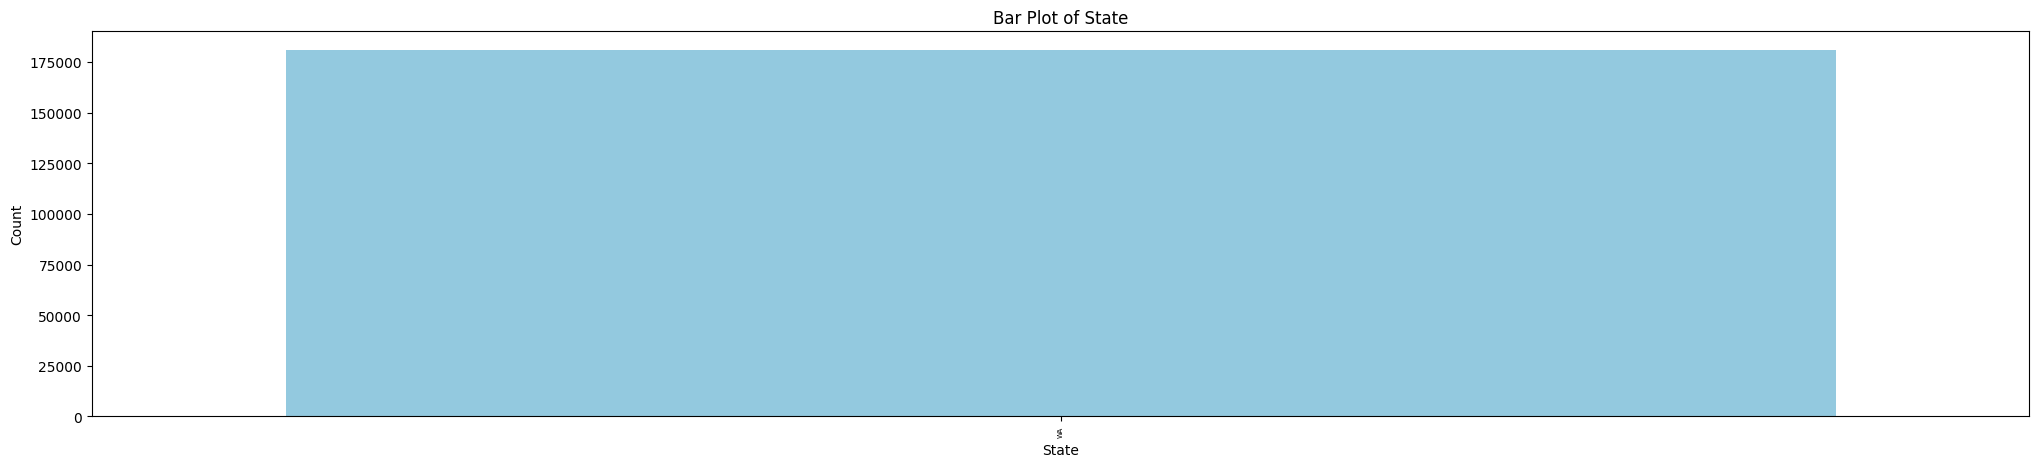


Frequency of values in 'State' (Ascending):
State
WA    181060
Name: count, dtype: int64

Frequency of values in 'State' (Descending):
State
WA    181060
Name: count, dtype: int64

count     181060
unique         1
top           WA
freq      181060
Name: State, dtype: object
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: State
Non-Null Count   Dtype 
--------------   ----- 
181060 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB
None



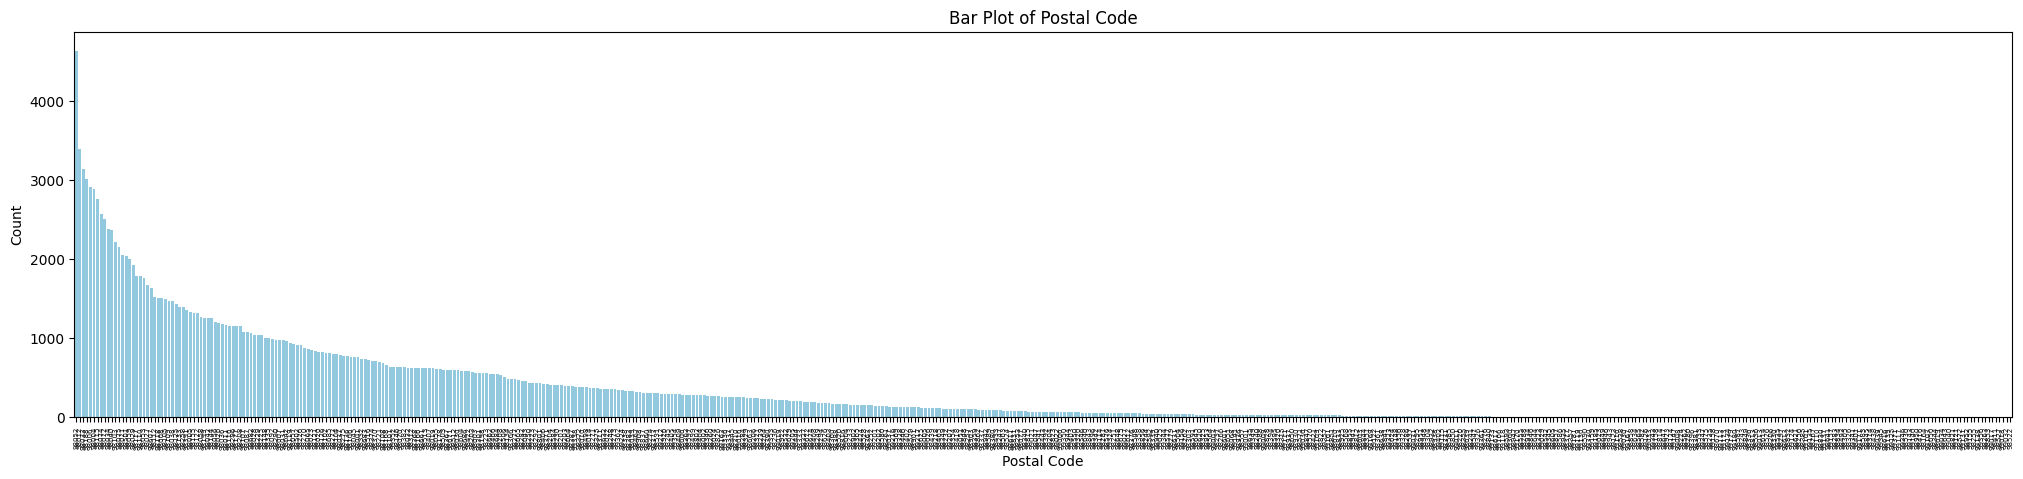


Frequency of values in 'Postal Code' (Ascending):
Postal Code
98522       1
99371       1
99117       1
99346       1
98530       1
         ... 
98006    2908
98188    3012
98033    3135
98012    3392
98052    4637
Name: count, Length: 543, dtype: int64

Frequency of values in 'Postal Code' (Descending):
Postal Code
98052    4637
98012    3392
98033    3135
98188    3012
98006    2908
         ... 
98530       1
99346       1
99117       1
99371       1
98522       1
Name: count, Length: 543, dtype: int64

count    181060.000000
mean      98260.629642
std         303.620777
min       98001.000000
25%       98052.000000
50%       98122.000000
75%       98371.000000
max       99403.000000
Name: Postal Code, dtype: float64
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: Postal Code
Non-Null Count   Dtype
--------------   -----
181060 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB
None



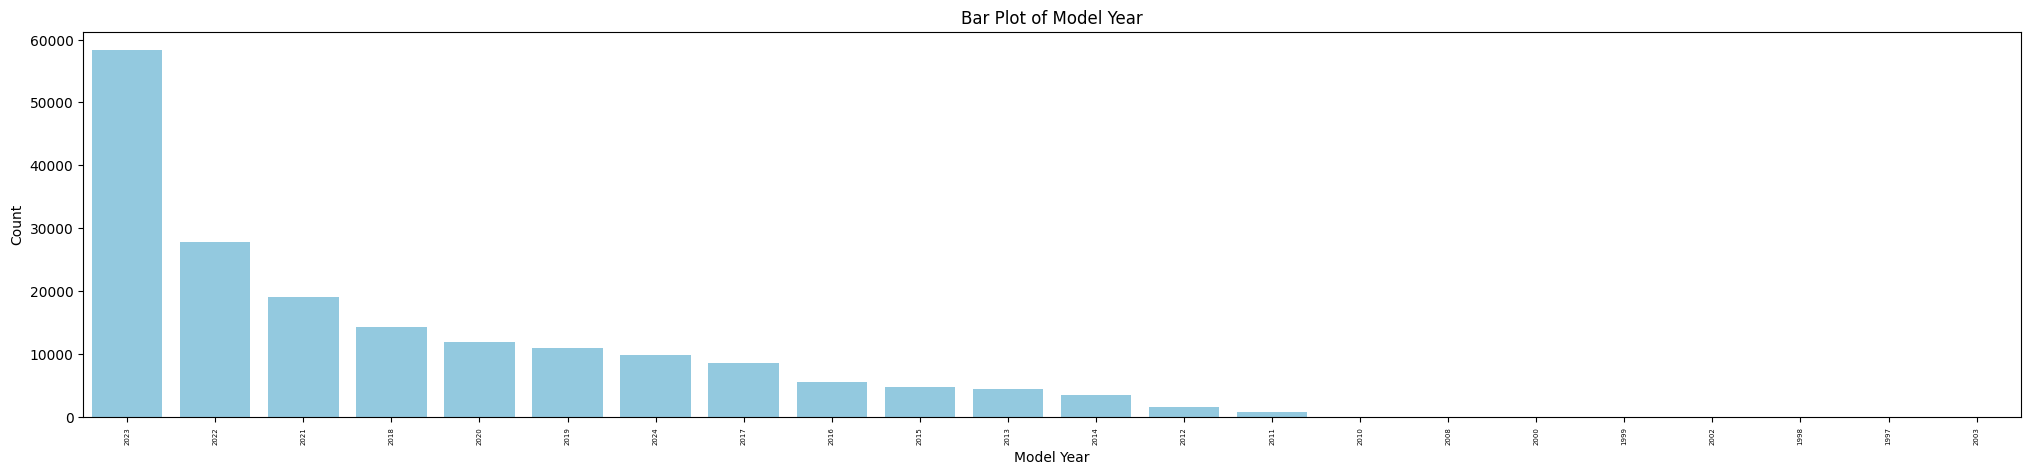


Frequency of values in 'Model Year' (Ascending):
Model Year
2003        1
1998        1
1997        1
2002        2
1999        5
2000        7
2008       20
2010       23
2011      770
2012     1599
2014     3489
2013     4366
2015     4802
2016     5509
2017     8565
2024     9787
2019    10895
2020    11820
2018    14255
2021    18966
2022    27855
2023    58322
Name: count, dtype: int64

Frequency of values in 'Model Year' (Descending):
Model Year
2023    58322
2022    27855
2021    18966
2018    14255
2020    11820
2019    10895
2024     9787
2017     8565
2016     5509
2015     4802
2013     4366
2014     3489
2012     1599
2011      770
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

count    181060.000000
mean       2020.583304
std           2.991070
min        1997.000000
25%        2019.000000
50%        2022.000000
75%        2023.000000
max        2024.000000
Name: Model Year, dtype:

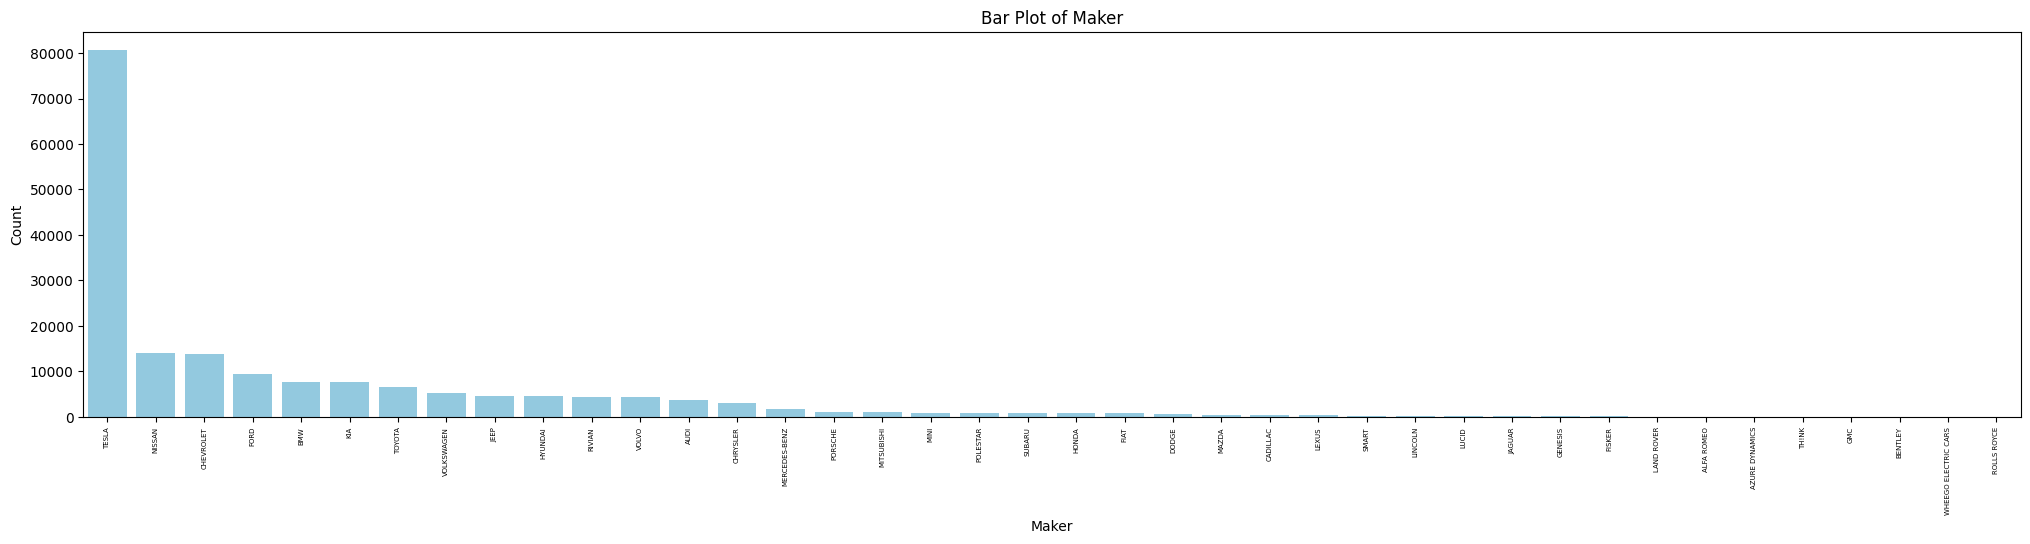


Frequency of values in 'Maker' (Ascending):
Maker
ROLLS ROYCE                 1
GMC                         3
WHEEGO ELECTRIC CARS        3
BENTLEY                     3
TH!NK                       5
AZURE DYNAMICS              8
ALFA ROMEO                 42
LAND ROVER                 57
FISKER                    111
GENESIS                   189
JAGUAR                    236
LUCID                     238
SMART                     269
LINCOLN                   269
LEXUS                     398
CADILLAC                  432
MAZDA                     506
DODGE                     607
FIAT                      783
HONDA                     834
SUBARU                    837
POLESTAR                  894
MINI                      925
MITSUBISHI                979
PORSCHE                  1157
MERCEDES-BENZ            1646
CHRYSLER                 3039
AUDI                     3729
VOLVO                    4278
RIVIAN                   4419
HYUNDAI                  4553
JEEP               

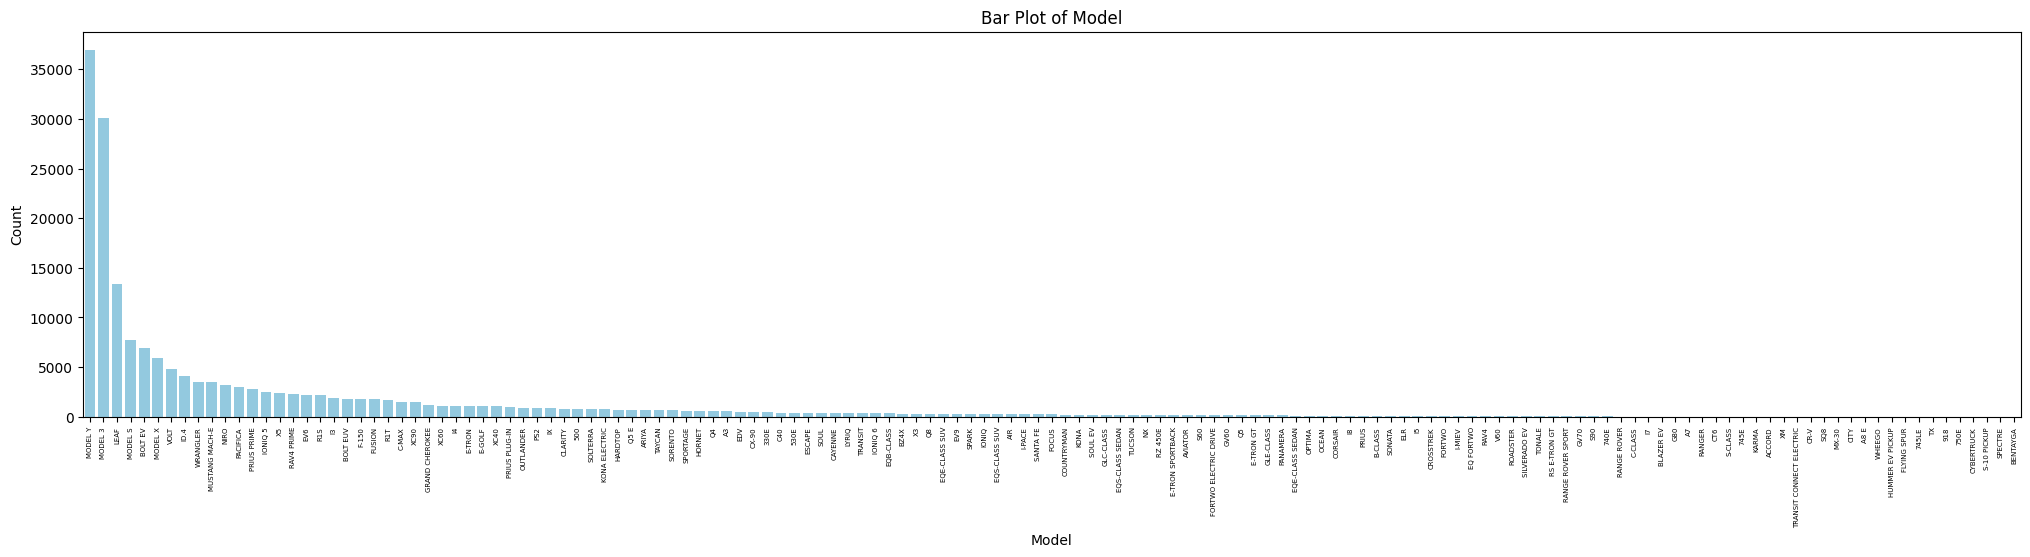


Frequency of values in 'Model' (Ascending):
Model
BENTAYGA           1
918                1
750E               1
SPECTRE            1
S-10 PICKUP        1
               ...  
BOLT EV         6926
MODEL S         7706
LEAF           13343
MODEL 3        30065
MODEL Y        36937
Name: count, Length: 143, dtype: int64

Frequency of values in 'Model' (Descending):
Model
MODEL Y        36937
MODEL 3        30065
LEAF           13343
MODEL S         7706
BOLT EV         6926
               ...  
750E               1
CYBERTRUCK         1
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 143, dtype: int64

count      181060
unique        143
top       MODEL Y
freq        36937
Name: Model, dtype: object
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: Model
Non-Null Count   Dtype 
--------------   ----- 
181060 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB
None



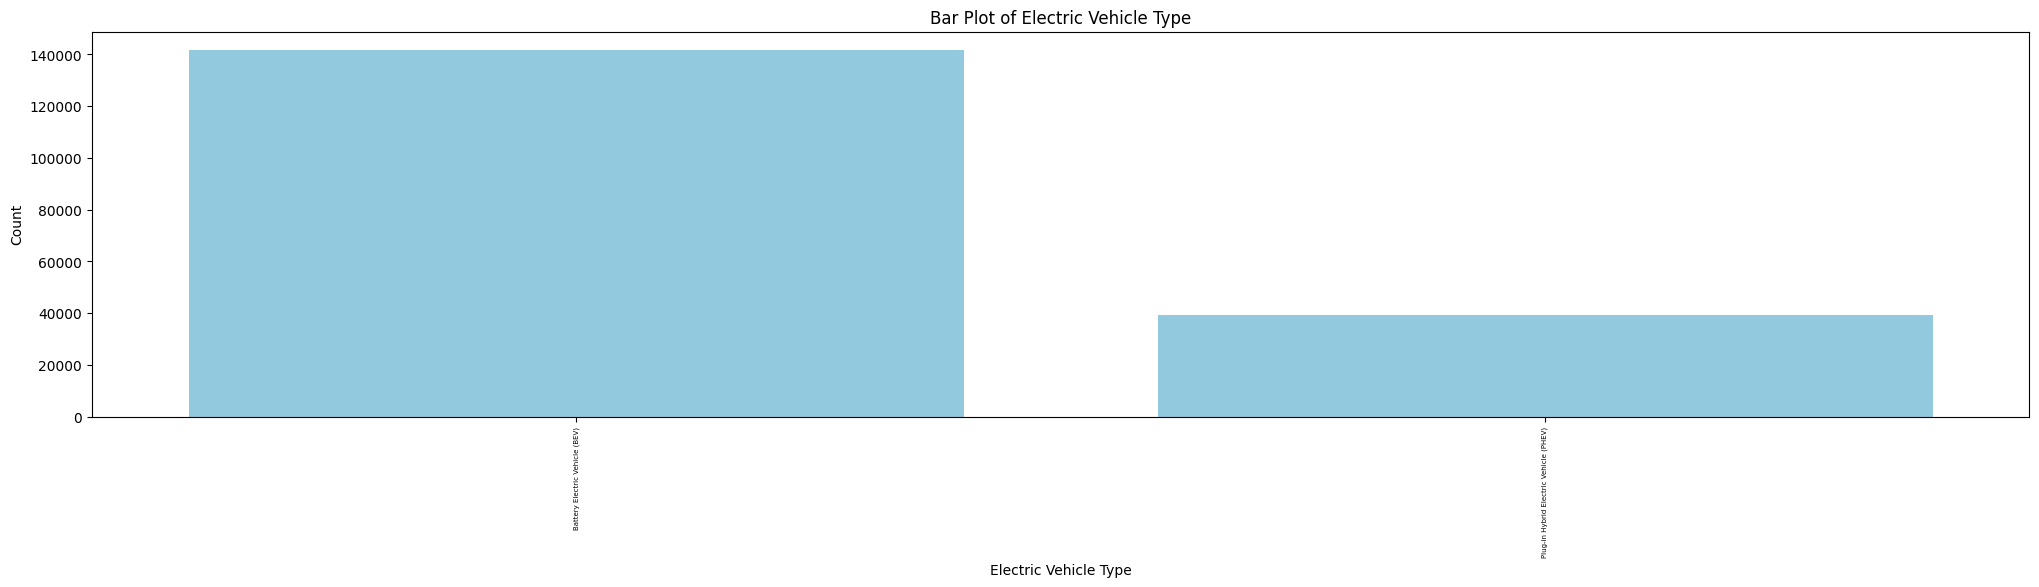


Frequency of values in 'Electric Vehicle Type' (Ascending):
Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)     39353
Battery Electric Vehicle (BEV)            141707
Name: count, dtype: int64

Frequency of values in 'Electric Vehicle Type' (Descending):
Electric Vehicle Type
Battery Electric Vehicle (BEV)            141707
Plug-in Hybrid Electric Vehicle (PHEV)     39353
Name: count, dtype: int64

count                             181060
unique                                 2
top       Battery Electric Vehicle (BEV)
freq                              141707
Name: Electric Vehicle Type, dtype: object
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: Electric Vehicle Type
Non-Null Count   Dtype 
--------------   ----- 
181060 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB
None



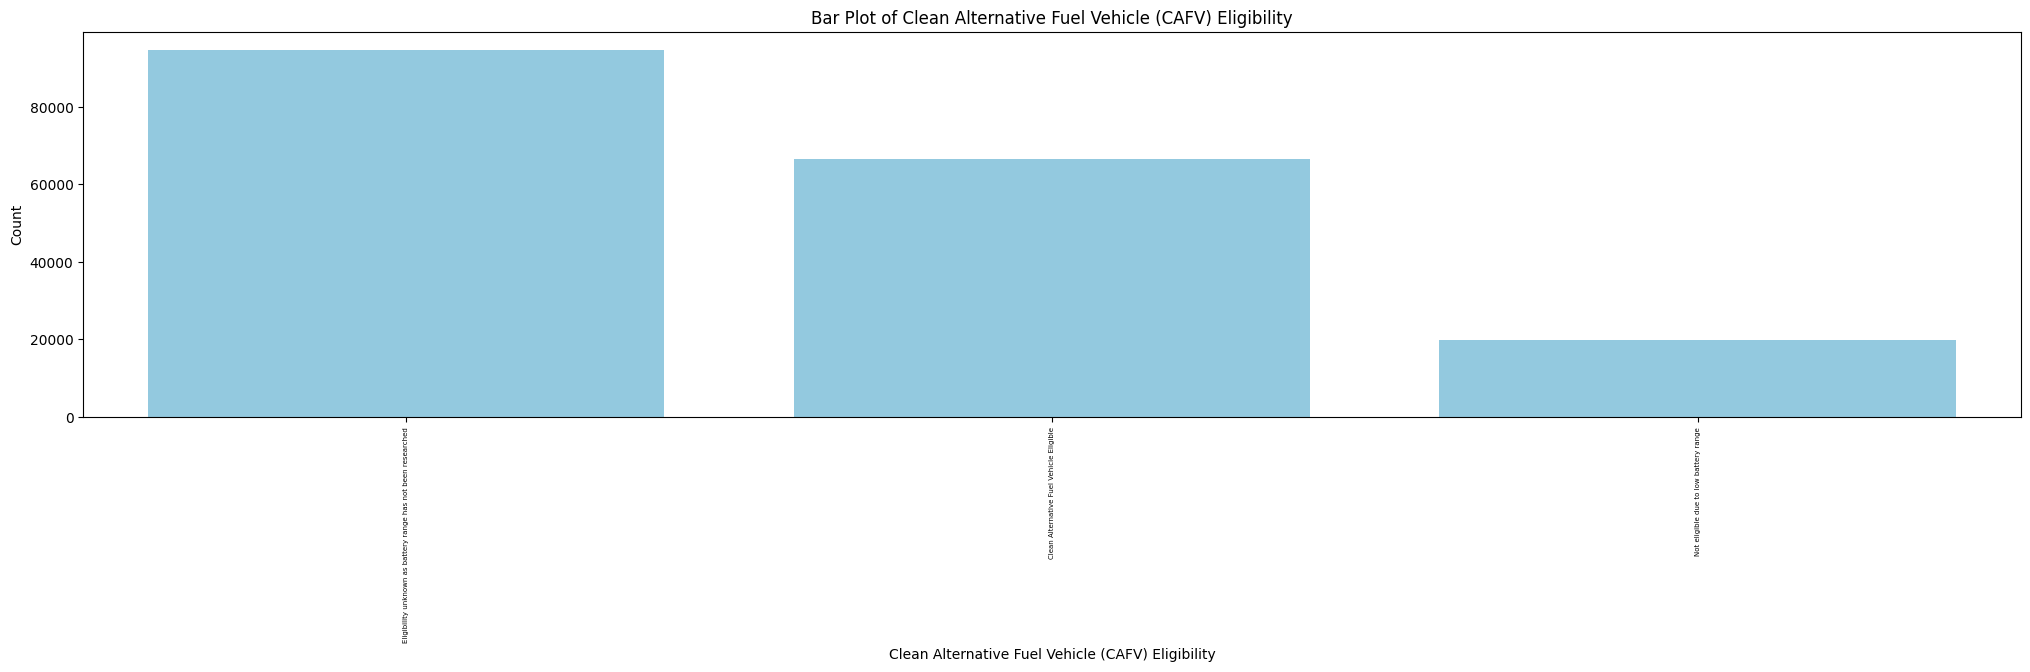


Frequency of values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' (Ascending):
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Not eligible due to low battery range                           19846
Clean Alternative Fuel Vehicle Eligible                         66647
Eligibility unknown as battery range has not been researched    94567
Name: count, dtype: int64

Frequency of values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' (Descending):
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    94567
Clean Alternative Fuel Vehicle Eligible                         66647
Not eligible due to low battery range                           19846
Name: count, dtype: int64

count                                                181060
unique                                                    3
top       Eligibility unknown as battery range has not b...
freq                                                  94567
Name: Cl

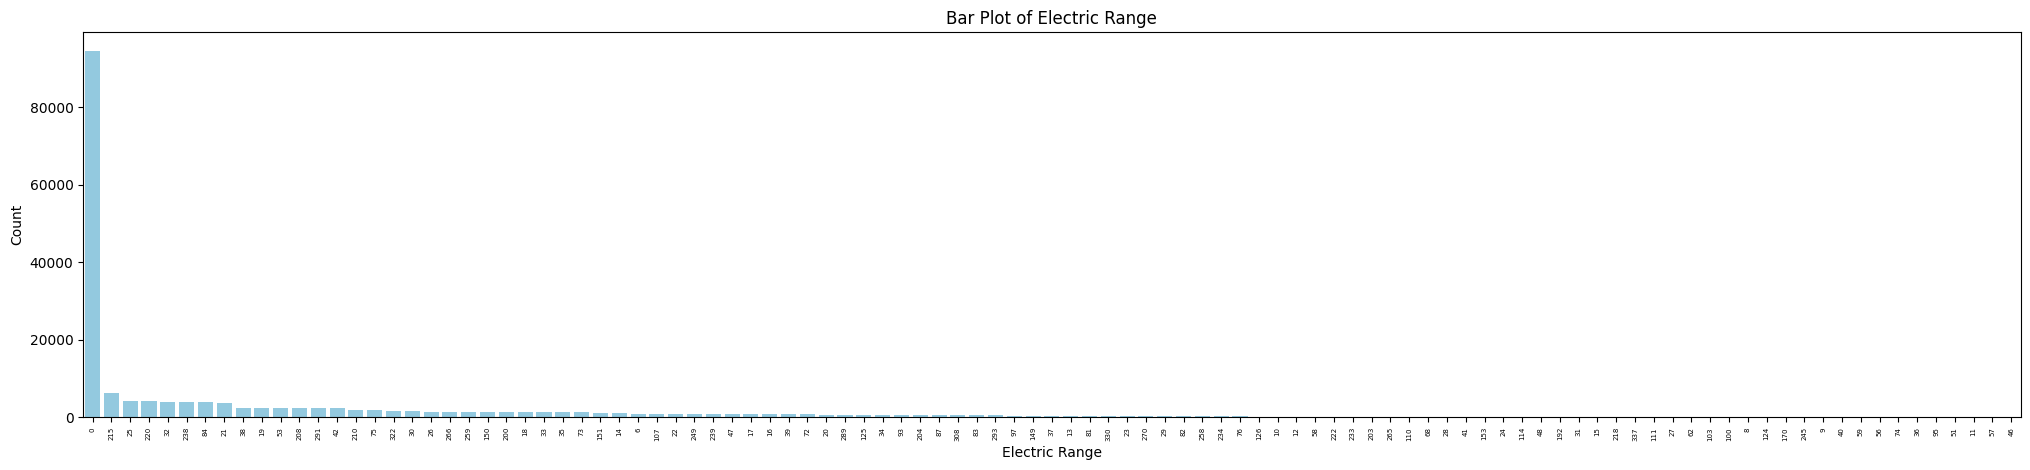


Frequency of values in 'Electric Range' (Ascending):
Electric Range
46         1
57         2
51         3
11         3
95         3
       ...  
32      4049
220     4064
25      4171
215     6375
0      94567
Name: count, Length: 103, dtype: int64

Frequency of values in 'Electric Range' (Descending):
Electric Range
0      94567
215     6375
25      4171
220     4064
32      4049
       ...  
95         3
51         3
11         3
57         2
46         1
Name: count, Length: 103, dtype: int64

count    181060.000000
mean         57.809290
std          91.386216
min           0.000000
25%           0.000000
50%           0.000000
75%          75.000000
max         337.000000
Name: Electric Range, dtype: float64
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: Electric Range
Non-Null Count   Dtype
--------------   -----
181060 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB
None



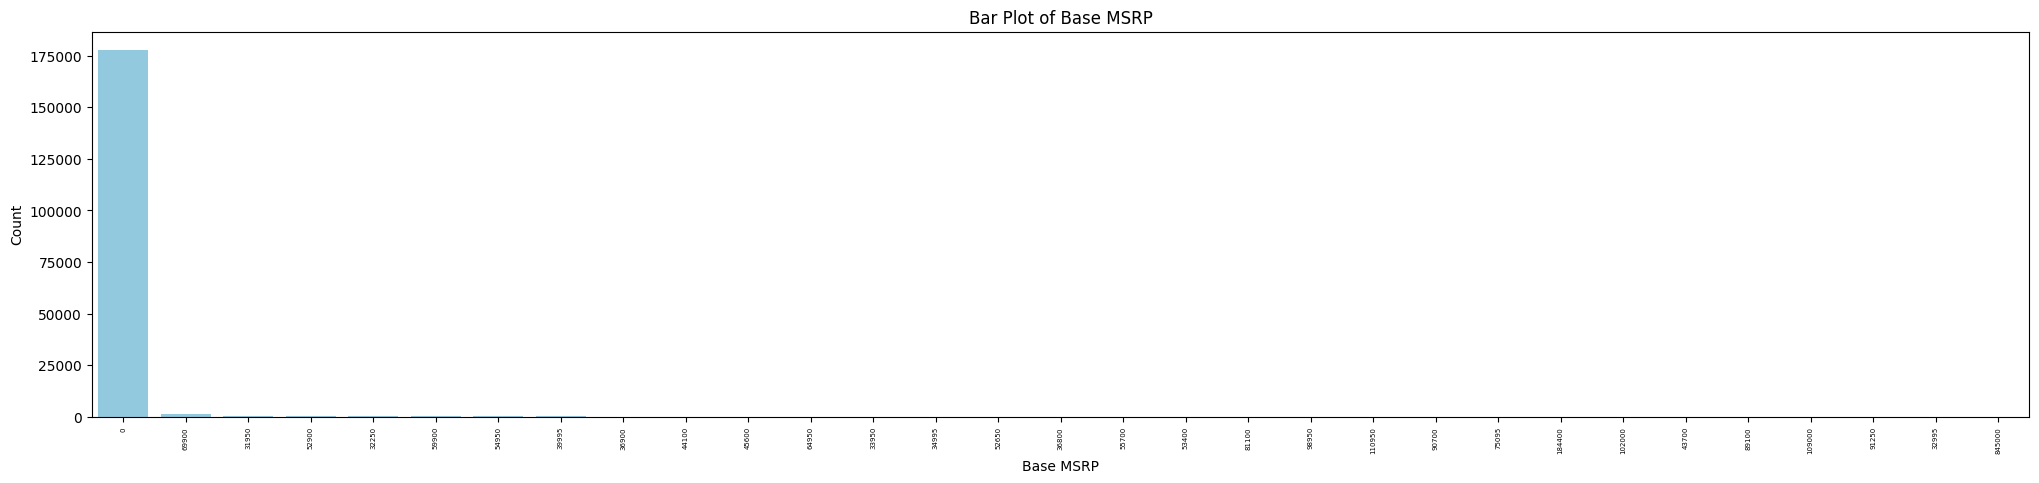


Frequency of values in 'Base MSRP' (Ascending):
Base MSRP
845000         1
32995          3
91250          5
109000         7
89100          8
43700          9
102000        10
184400        10
75095         13
90700         18
110950        20
98950         20
81100         22
53400         38
55700         51
36800         54
34995         65
52650         65
33950         74
64950         82
45600         82
44100         93
36900        104
39995        109
54950        129
59900        129
32250        134
52900        221
31950        382
69900       1342
0         177760
Name: count, dtype: int64

Frequency of values in 'Base MSRP' (Descending):
Base MSRP
0         177760
69900       1342
31950        382
52900        221
32250        134
59900        129
54950        129
39995        109
36900        104
44100         93
45600         82
64950         82
33950         74
34995         65
52650         65
36800         54
55700         51
53400         38
81100         22
98950

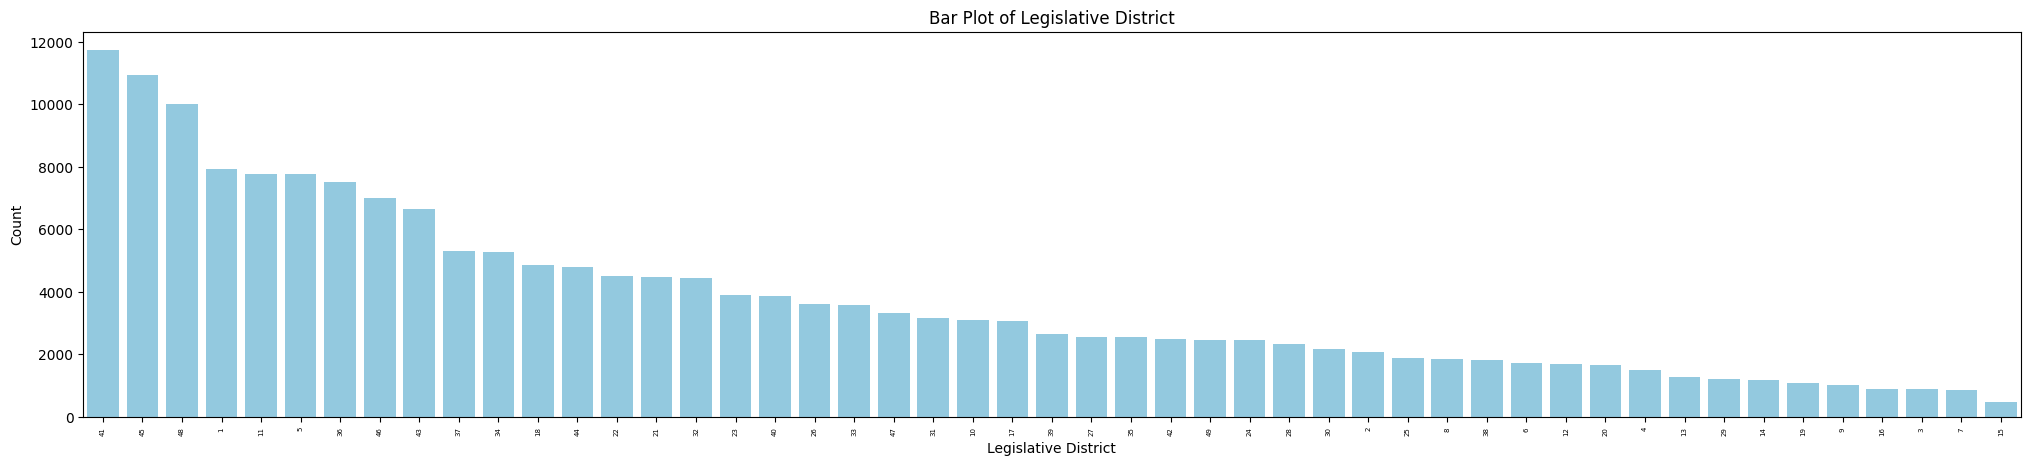


Frequency of values in 'Legislative District' (Ascending):
Legislative District
15      458
7       852
3       897
16      899
9      1011
19     1073
14     1169
29     1212
13     1259
4      1503
20     1654
12     1688
6      1715
38     1799
8      1856
25     1887
2      2071
30     2151
28     2315
24     2438
49     2448
42     2488
35     2539
27     2552
39     2630
17     3063
10     3084
31     3165
47     3306
33     3566
26     3608
40     3869
23     3902
32     4449
21     4480
22     4511
44     4784
18     4859
34     5263
37     5313
43     6656
46     7005
36     7523
5      7755
11     7761
1      7907
48    10003
45    10937
41    11727
Name: count, dtype: int64

Frequency of values in 'Legislative District' (Descending):
Legislative District
41    11727
45    10937
48    10003
1      7907
11     7761
5      7755
36     7523
46     7005
43     6656
37     5313
34     5263
18     4859
44     4784
22     4511
21     4480
32     4449
23     3902
40     3869
26     

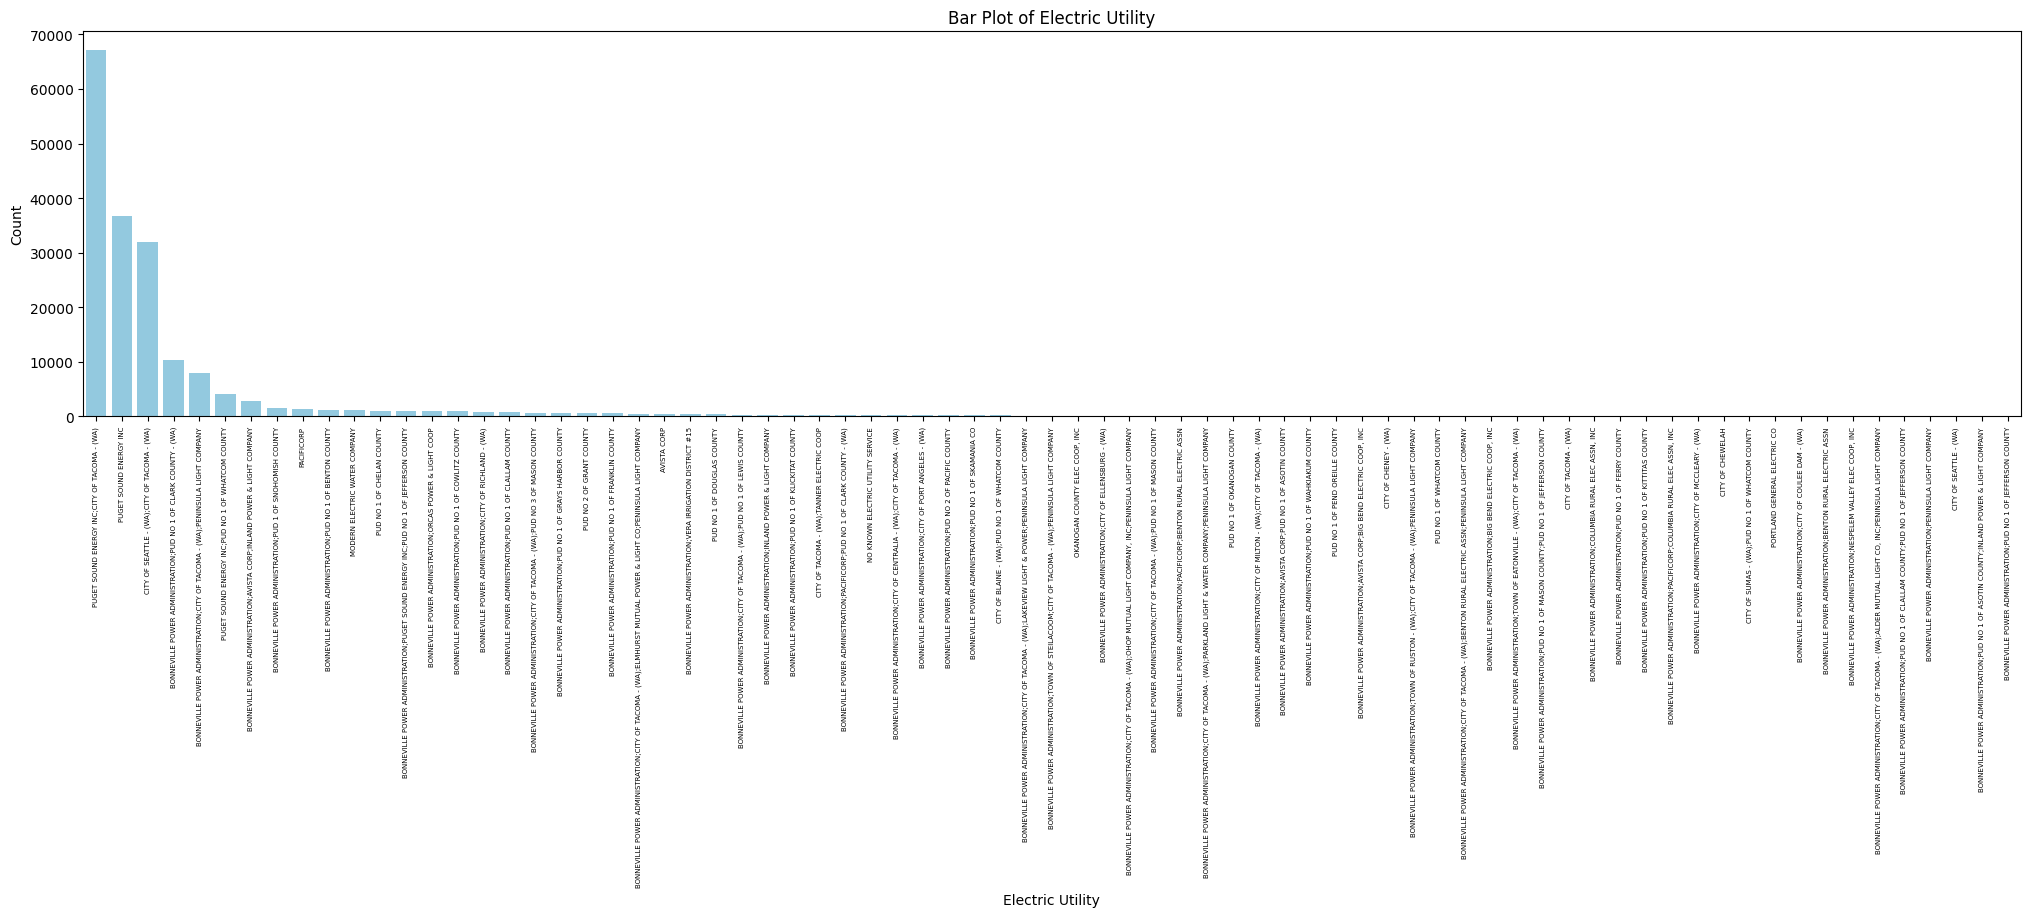


Frequency of values in 'Electric Utility' (Ascending):
Electric Utility
BONNEVILLE POWER ADMINISTRATION;PUD NO 1 OF JEFFERSON COUNTY                                   1
BONNEVILLE POWER ADMINISTRATION;PUD NO 1 OF CLALLAM COUNTY;PUD NO 1 OF JEFFERSON COUNTY        1
BONNEVILLE POWER ADMINISTRATION;PUD NO 1 OF ASOTIN COUNTY;INLAND POWER & LIGHT COMPANY         1
CITY OF SEATTLE - (WA)                                                                         1
BONNEVILLE POWER ADMINISTRATION;PENINSULA LIGHT COMPANY                                        1
                                                                                           ...  
BONNEVILLE POWER ADMINISTRATION;CITY OF TACOMA - (WA);PENINSULA LIGHT COMPANY               7959
BONNEVILLE POWER ADMINISTRATION;PUD NO 1 OF CLARK COUNTY - (WA)                            10420
CITY OF SEATTLE - (WA);CITY OF TACOMA - (WA)                                               32012
PUGET SOUND ENERGY INC                                

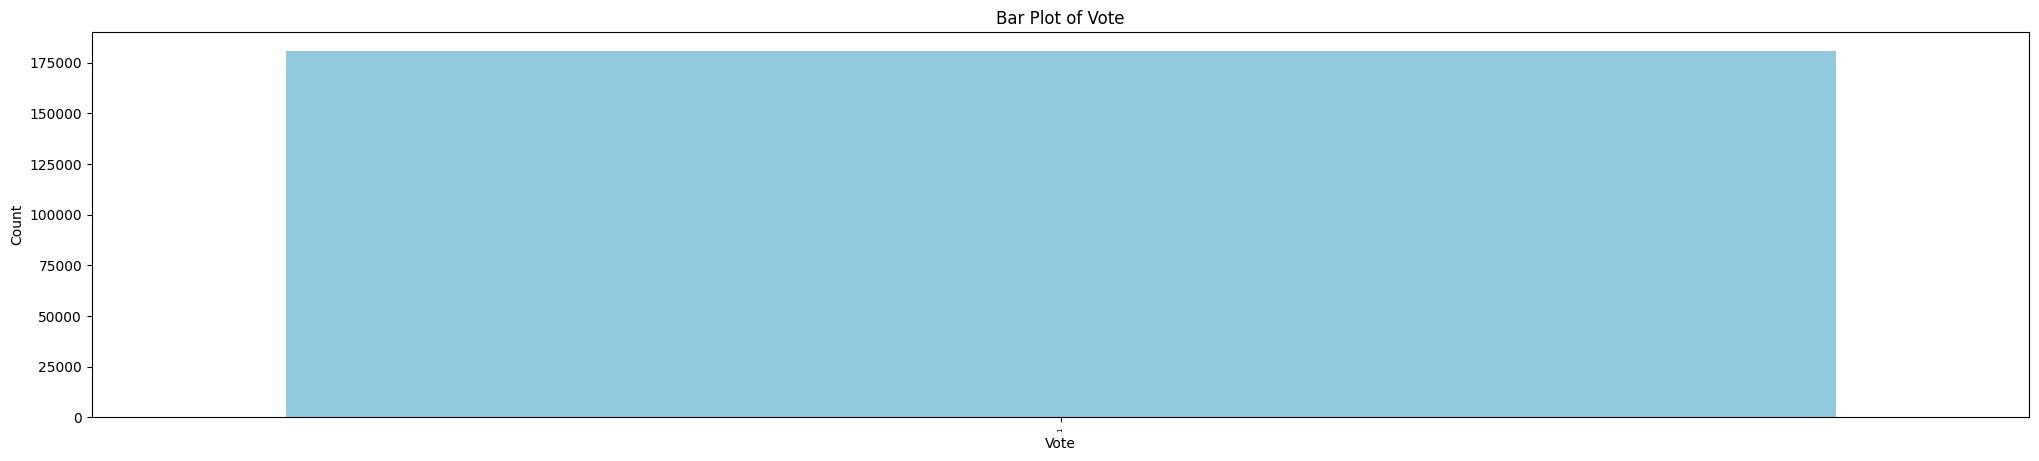


Frequency of values in 'Vote' (Ascending):
Vote
1    181060
Name: count, dtype: int64

Frequency of values in 'Vote' (Descending):
Vote
1    181060
Name: count, dtype: int64

count    181060.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Vote, dtype: float64
<class 'pandas.core.series.Series'>
Index: 181060 entries, 0 to 181457
Series name: Vote
Non-Null Count   Dtype
--------------   -----
181060 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB
None



In [ ]:
# 3. Number of Unique Values
unique_counts3 = df3.nunique()
print("Number of unique values per column:")
print(unique_counts3)
print(df3.info())
print(df3.describe(include='all'))

# # 2. Count Graph for Non-Numeric Data (including NA values)
# # for column in df.columns:
for column in df3.columns:
#     # if not pd.api.types.is_numeric_dtype(df2[column]):
#     else:
    plt.figure(figsize=(25, 5))
    # print(column, df2[column].unique().astype(str))
    # Count plot for categorical data including NA values
    df3[column] = df3[column].fillna(pd.NA)
    sns.countplot(x=df3[column], color='skyblue', order=df3[column].value_counts().index)
    # sns.countplot(x=df2[column], color='skyblue', order=sorted(df2[column].unique().astype(str)))
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=5)
    # plt.tight_layout()
    plt.show()

# 4. Frequency Table (Ascending Order) including NA
# 5. Frequency Table (Descending Order) including NA
# for column in df2.columns:
    # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
    frequency_table = df3[column].value_counts(dropna=False).sort_values(ascending=True)
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Ascending):")
    print(frequency_table)
    frequency_table = df3[column].value_counts(dropna=False).sort_values(ascending=False)
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Descending):")
    print(frequency_table)
    print()
    print(df3[column].describe(include='all'))
    print(df3[column].info())
    print()

In [ ]:
# # Step 1: Count the occurrences of each unique value in 'Postal Code'
# postal_code_counts = df2['Postal Code'].value_counts()

# # Step 2: Count the occurrences of each unique value in 'Vehicle Location'
# vehicle_location_counts = df2['Vehicle Location'].fillna(0).value_counts()

# print('Postal Code Counts:')
# print(postal_code_counts)
# print()
# print('Vehicle Location Counts:')
# print(vehicle_location_counts)
# # Step 3: Create a DataFrame from these counts
# # Align the indices of both series to ensure they match
# counts_df = pd.DataFrame({
#     'Postal Code Count': postal_code_counts.values,
#     'Vehicle Location Count': vehicle_location_counts.values
# }).fillna(0)  # Fill NaNs with 0 for missing values

# # Step 4: Calculate the correlation between the counts of the two columns
# correlation = counts_df.corr().iloc[0, 1]

# print("Correlation between counts of 'Postal Code' and 'Vehicle Location':", correlation)

Number of unique values per column:
County                                                39
City                                                 468
State                                                  1
Postal Code                                          543
Model Year                                            22
Maker                                                 40
Model                                                143
Electric Vehicle Type                                  2
Clean Alternative Fuel Vehicle (CAFV) Eligibility      3
Electric Range                                       103
Base MSRP                                             31
Legislative District                                  49
Vote                                                   1
Electric Utility Indiv                                62
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 335909 entries, 0 to 181457
Data columns (total 14 columns):
 #   Column                                    

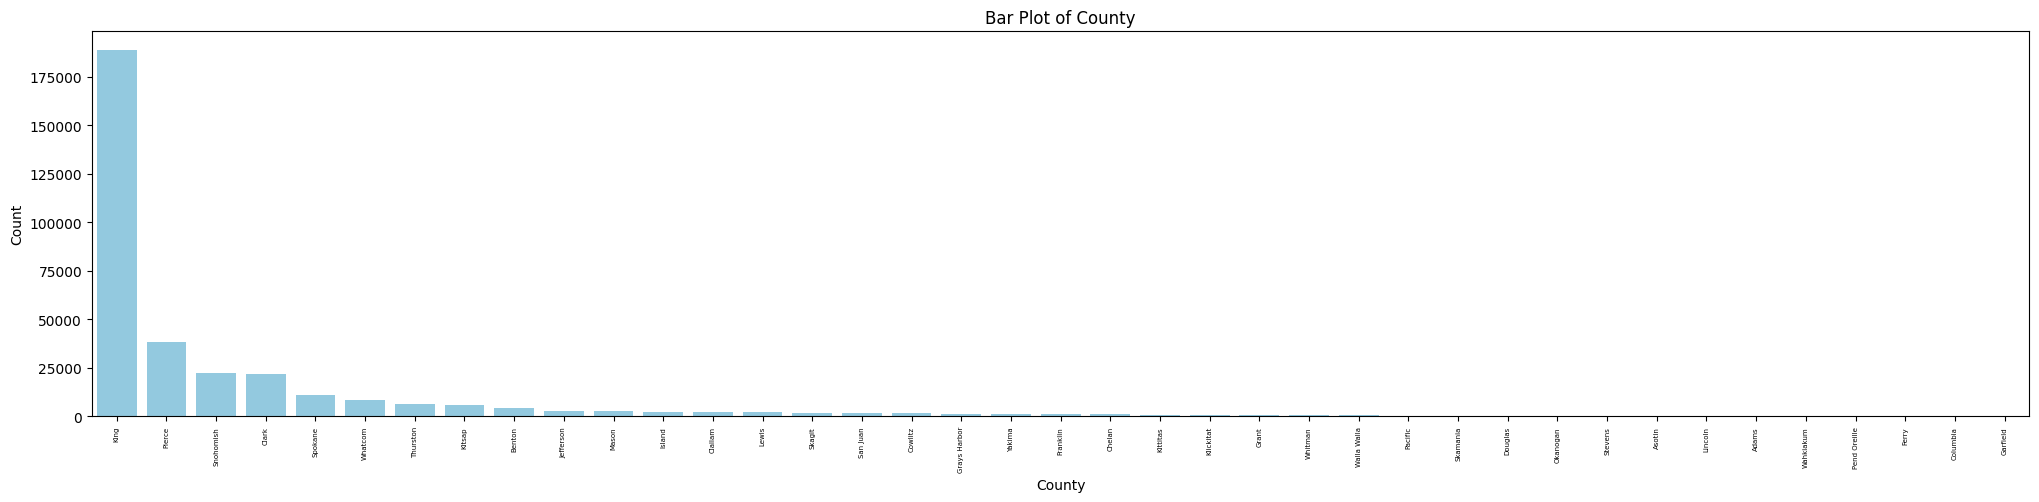


Frequency of values in 'County' (Ascending):
County
Garfield             3
Columbia            30
Ferry               49
Pend Oreille        56
Wahkiakum          122
Adams              143
Lincoln            147
Asotin             222
Stevens            227
Okanogan           279
Douglas            371
Skamania           392
Pacific            418
Walla Walla        474
Whitman            493
Grant              585
Klickitat          588
Kittitas           794
Chelan            1078
Franklin          1171
Yakima            1264
Grays Harbor      1295
Cowlitz           1870
San Juan          1890
Skagit            1968
Lewis             2098
Clallam           2155
Island            2381
Mason             2510
Jefferson         2981
Benton            4366
Kitsap            5957
Thurston          6600
Whatcom           8621
Spokane          10851
Clark            21571
Snohomish        22528
Pierce           38423
King            188938
Name: count, dtype: int64

Frequency of values in 

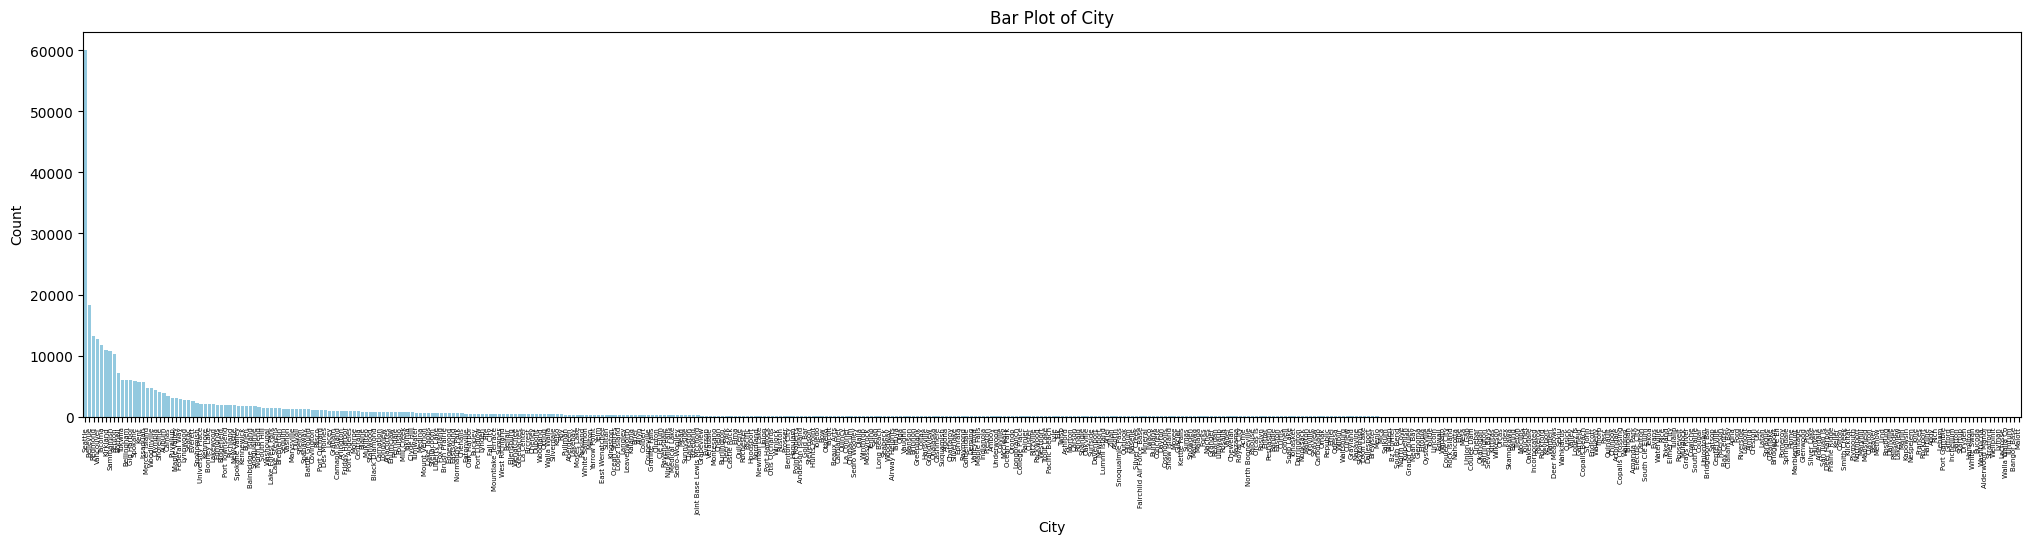


Frequency of values in 'City' (Ascending):
City
Malott           1
Gifford          1
Inchelium        1
Hatton           1
Startup          1
             ...  
Tacoma       11707
Vancouver    12653
Redmond      13136
Bellevue     18232
Seattle      60070
Name: count, Length: 468, dtype: int64

Frequency of values in 'City' (Descending):
City
Seattle      60070
Bellevue     18232
Redmond      13136
Vancouver    12653
Tacoma       11707
             ...  
Dryden           1
Startup          1
Hatton           1
Inchelium        1
Malott           1
Name: count, Length: 468, dtype: int64

count      335909
unique        468
top       Seattle
freq        60070
Name: City, dtype: object
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: City
Non-Null Count   Dtype 
--------------   ----- 
335909 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB
None



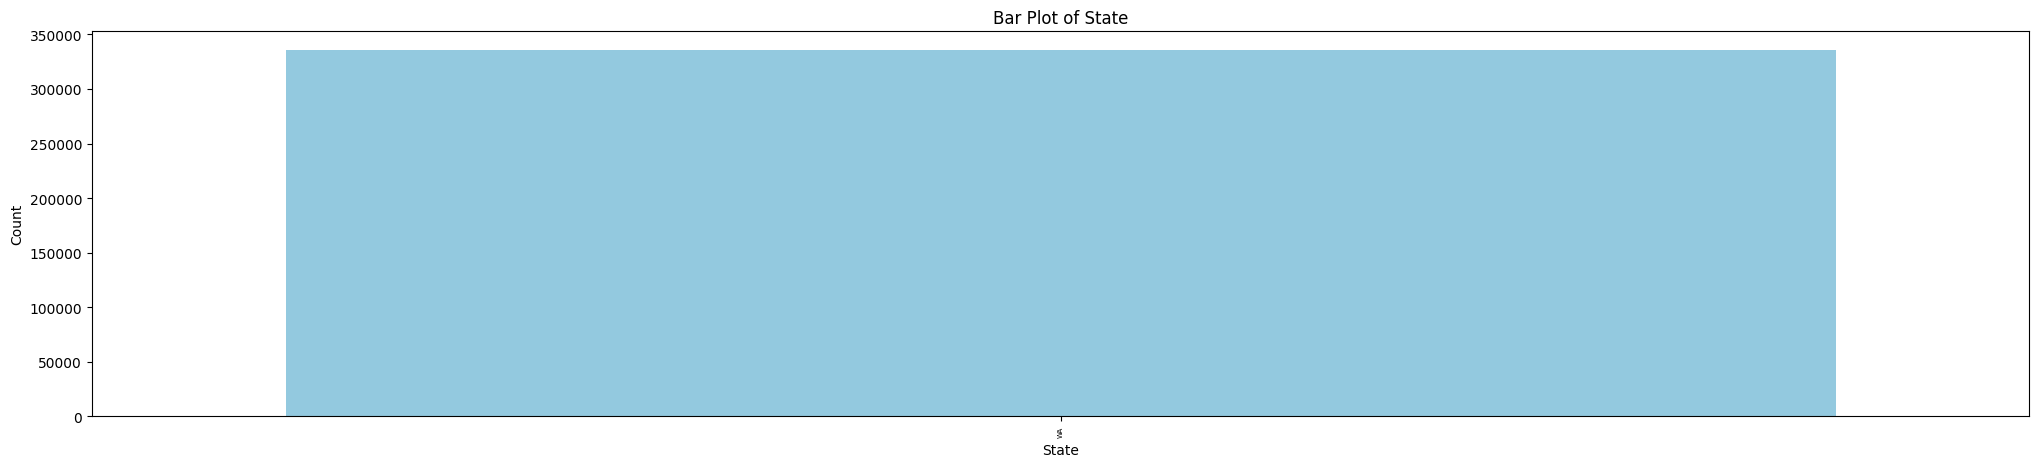


Frequency of values in 'State' (Ascending):
State
WA    335909
Name: count, dtype: int64

Frequency of values in 'State' (Descending):
State
WA    335909
Name: count, dtype: int64

count     335909
unique         1
top           WA
freq      335909
Name: State, dtype: object
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: State
Non-Null Count   Dtype 
--------------   ----- 
335909 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB
None



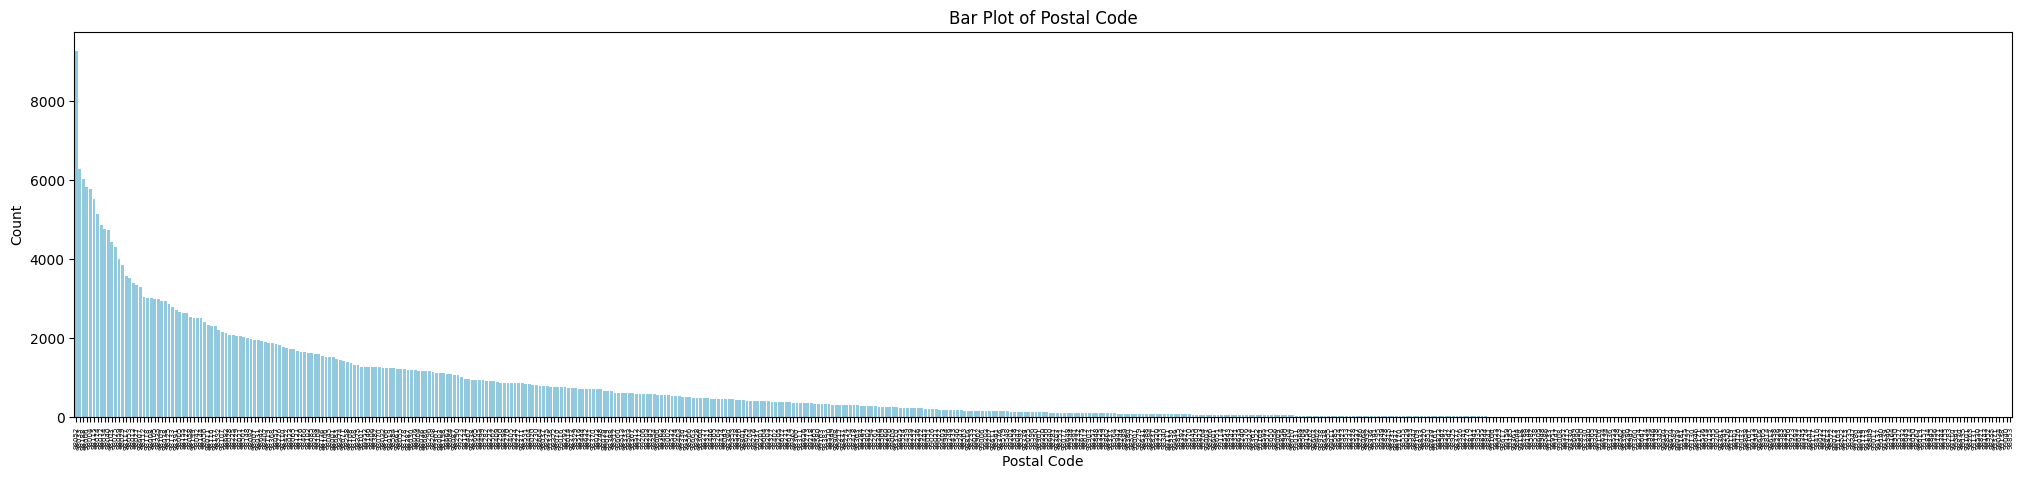


Frequency of values in 'Postal Code' (Ascending):
Postal Code
98853       1
98263       1
99131       1
98530       1
98821       1
         ... 
98004    5770
98006    5816
98188    6024
98033    6270
98052    9274
Name: count, Length: 543, dtype: int64

Frequency of values in 'Postal Code' (Descending):
Postal Code
98052    9274
98033    6270
98188    6024
98006    5816
98004    5770
         ... 
99143       1
98821       1
98530       1
99131       1
98853       1
Name: count, Length: 543, dtype: int64

count    335909.000000
mean      98264.479975
std         307.086483
min       98001.000000
25%       98052.000000
50%       98122.000000
75%       98382.000000
max       99403.000000
Name: Postal Code, dtype: float64
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: Postal Code
Non-Null Count   Dtype
--------------   -----
335909 non-null  int64
dtypes: int64(1)
memory usage: 5.1 MB
None



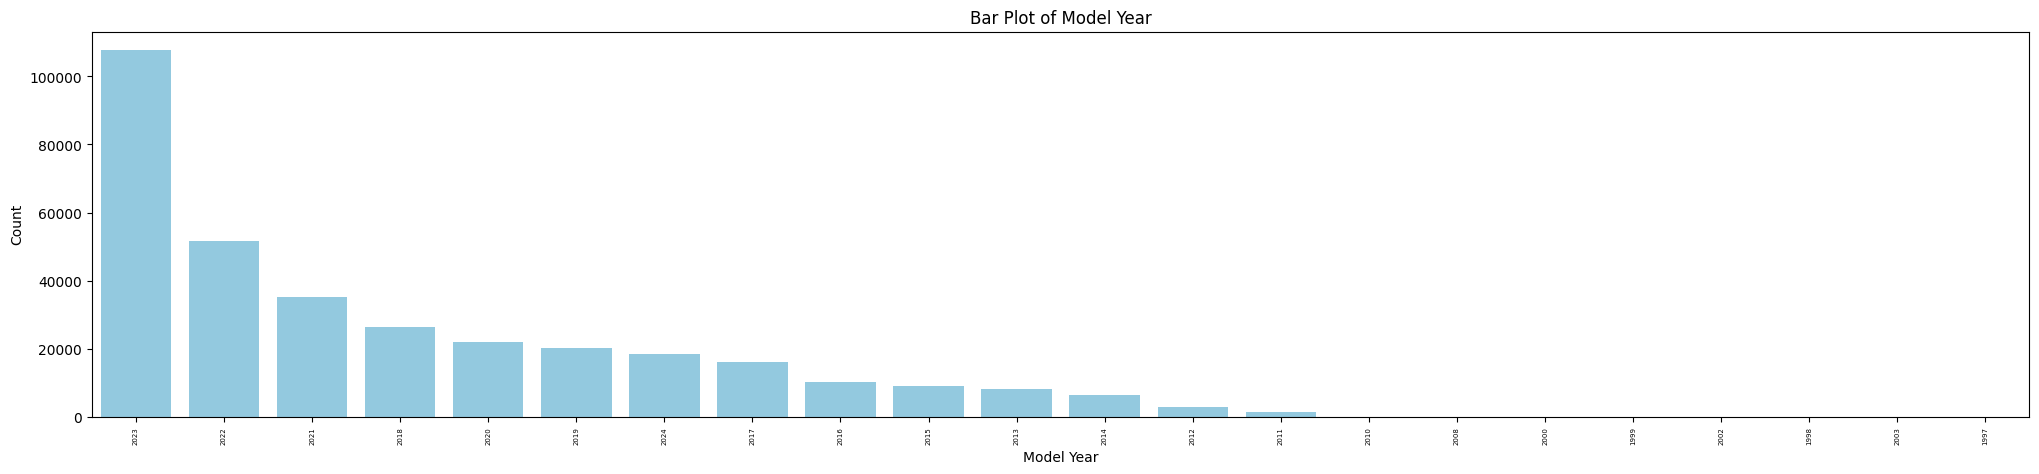


Frequency of values in 'Model Year' (Ascending):
Model Year
1997         1
1998         2
2003         2
2002         4
1999        11
2000        13
2008        40
2010        47
2011      1430
2012      2941
2014      6452
2013      8083
2015      8920
2016     10307
2017     15959
2024     18405
2019     20262
2020     21956
2018     26487
2021     35223
2022     51611
2023    107753
Name: count, dtype: int64

Frequency of values in 'Model Year' (Descending):
Model Year
2023    107753
2022     51611
2021     35223
2018     26487
2020     21956
2019     20262
2024     18405
2017     15959
2016     10307
2015      8920
2013      8083
2014      6452
2012      2941
2011      1430
2010        47
2008        40
2000        13
1999        11
2002         4
1998         2
2003         2
1997         1
Name: count, dtype: int64

count    335909.000000
mean       2020.580747
std           2.991797
min        1997.000000
25%        2019.000000
50%        2022.000000
75%        2023.000000
max

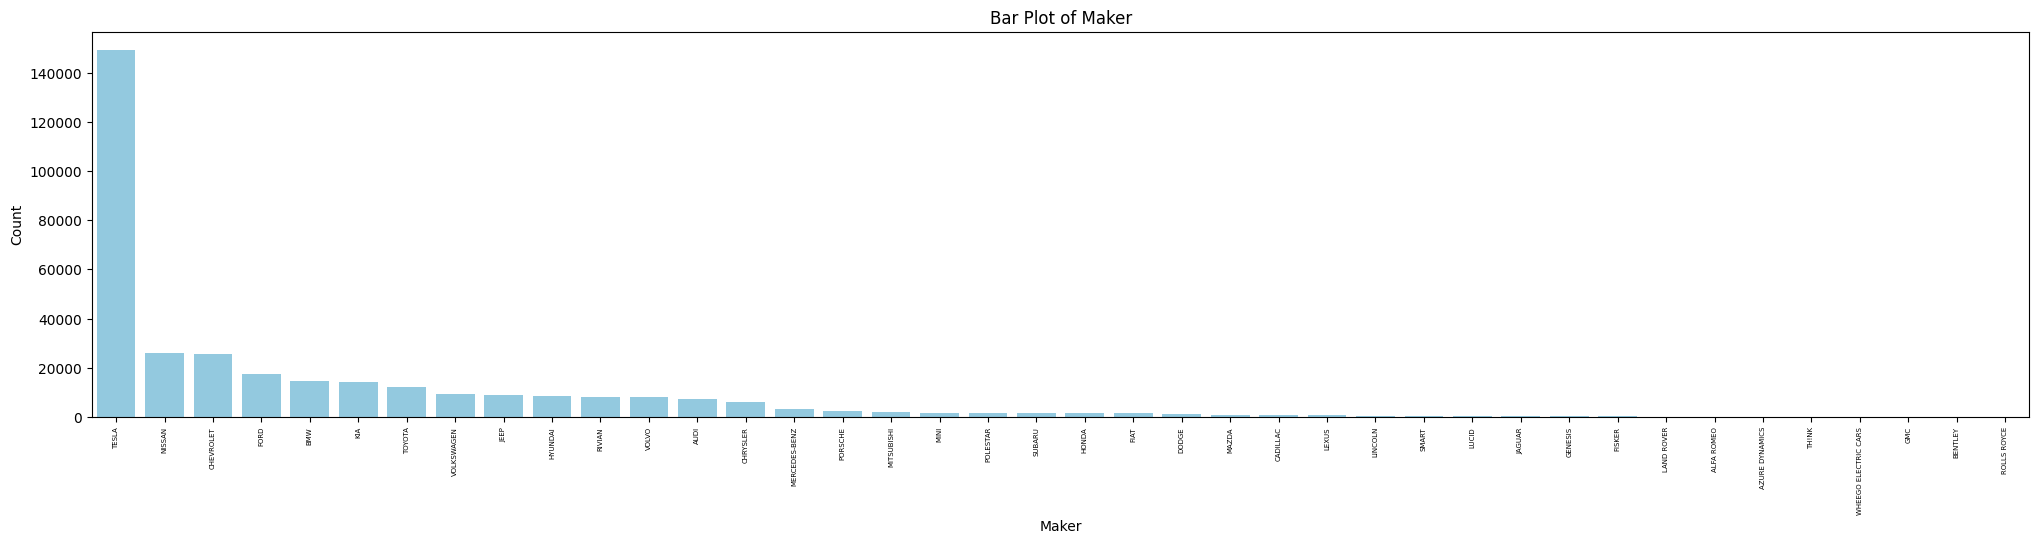


Frequency of values in 'Maker' (Ascending):
Maker
ROLLS ROYCE                  1
BENTLEY                      4
GMC                          5
WHEEGO ELECTRIC CARS         7
TH!NK                       10
AZURE DYNAMICS              14
ALFA ROMEO                  70
LAND ROVER                 116
FISKER                     205
GENESIS                    332
JAGUAR                     436
LUCID                      443
SMART                      496
LINCOLN                    507
LEXUS                      760
CADILLAC                   793
MAZDA                      922
DODGE                     1204
FIAT                      1470
HONDA                     1550
SUBARU                    1566
POLESTAR                  1683
MINI                      1724
MITSUBISHI                1794
PORSCHE                   2230
MERCEDES-BENZ             3092
CHRYSLER                  5847
AUDI                      7090
VOLVO                     7936
RIVIAN                    8185
HYUNDAI            

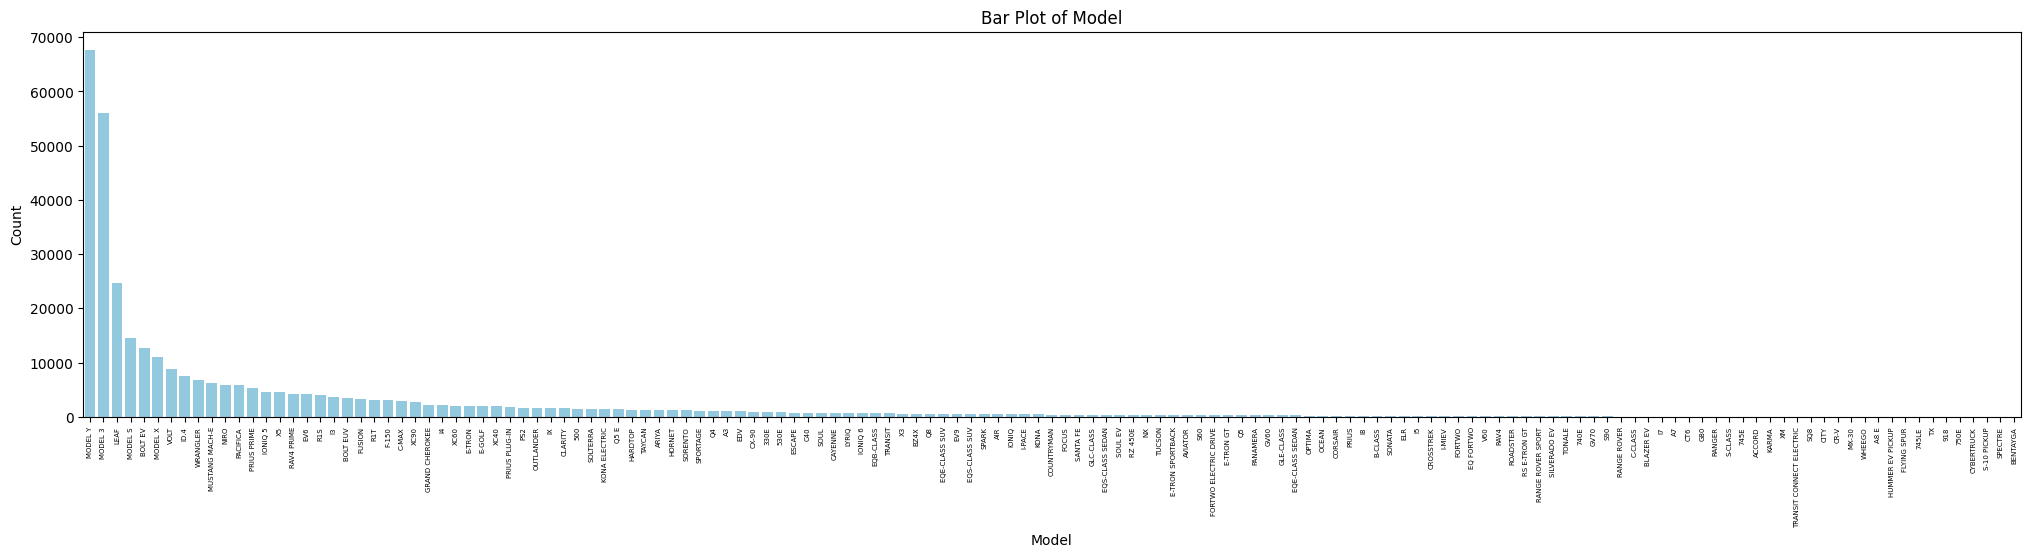


Frequency of values in 'Model' (Ascending):
Model
BENTAYGA           1
SPECTRE            1
S-10 PICKUP        1
918                2
CYBERTRUCK         2
               ...  
BOLT EV        12600
MODEL S        14493
LEAF           24620
MODEL 3        56108
MODEL Y        67641
Name: count, Length: 143, dtype: int64

Frequency of values in 'Model' (Descending):
Model
MODEL Y        67641
MODEL 3        56108
LEAF           24620
MODEL S        14493
BOLT EV        12600
               ...  
750E               2
CYBERTRUCK         2
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 143, dtype: int64

count      335909
unique        143
top       MODEL Y
freq        67641
Name: Model, dtype: object
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: Model
Non-Null Count   Dtype 
--------------   ----- 
335909 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB
None



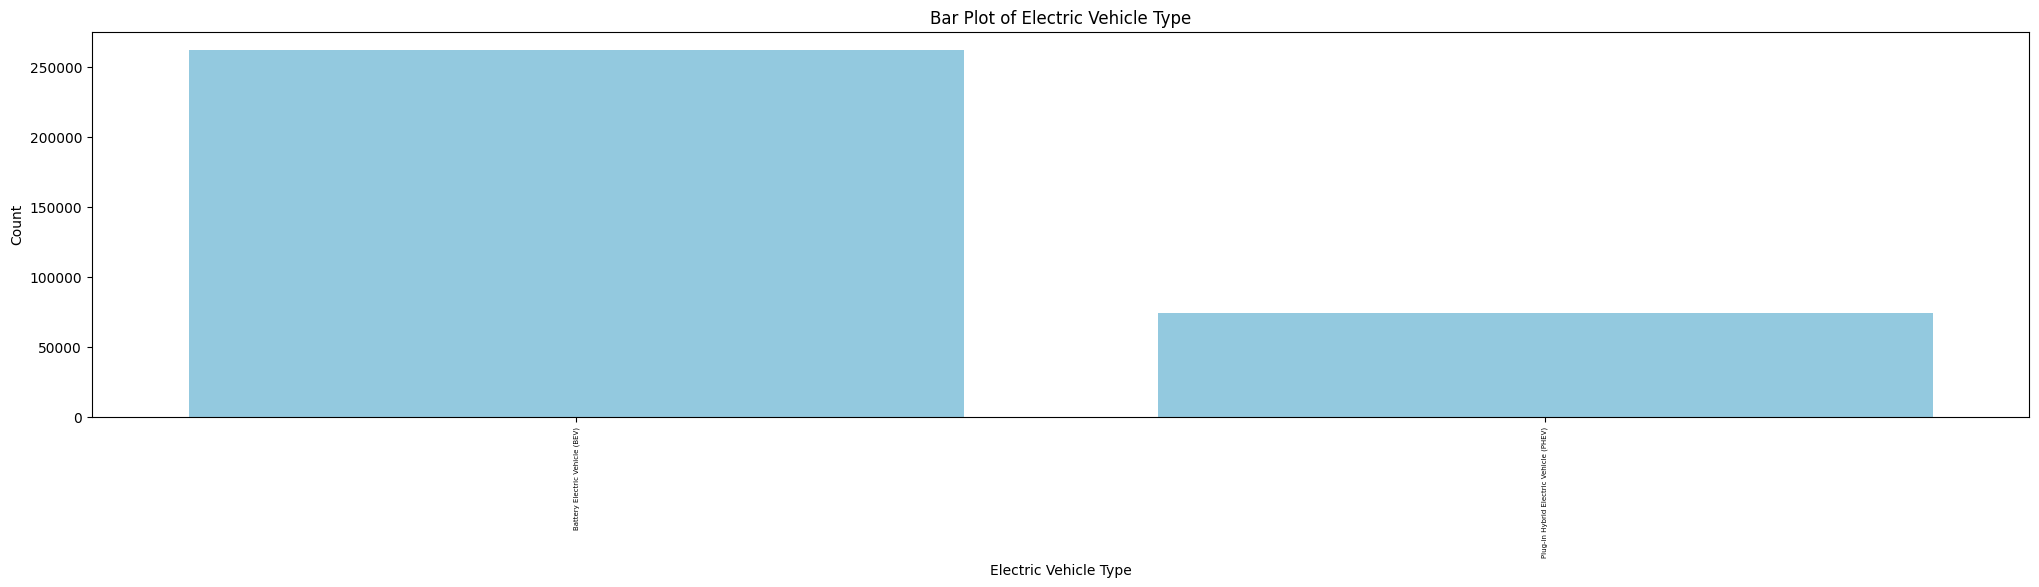


Frequency of values in 'Electric Vehicle Type' (Ascending):
Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)     73873
Battery Electric Vehicle (BEV)            262036
Name: count, dtype: int64

Frequency of values in 'Electric Vehicle Type' (Descending):
Electric Vehicle Type
Battery Electric Vehicle (BEV)            262036
Plug-in Hybrid Electric Vehicle (PHEV)     73873
Name: count, dtype: int64

count                             335909
unique                                 2
top       Battery Electric Vehicle (BEV)
freq                              262036
Name: Electric Vehicle Type, dtype: object
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: Electric Vehicle Type
Non-Null Count   Dtype 
--------------   ----- 
335909 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB
None



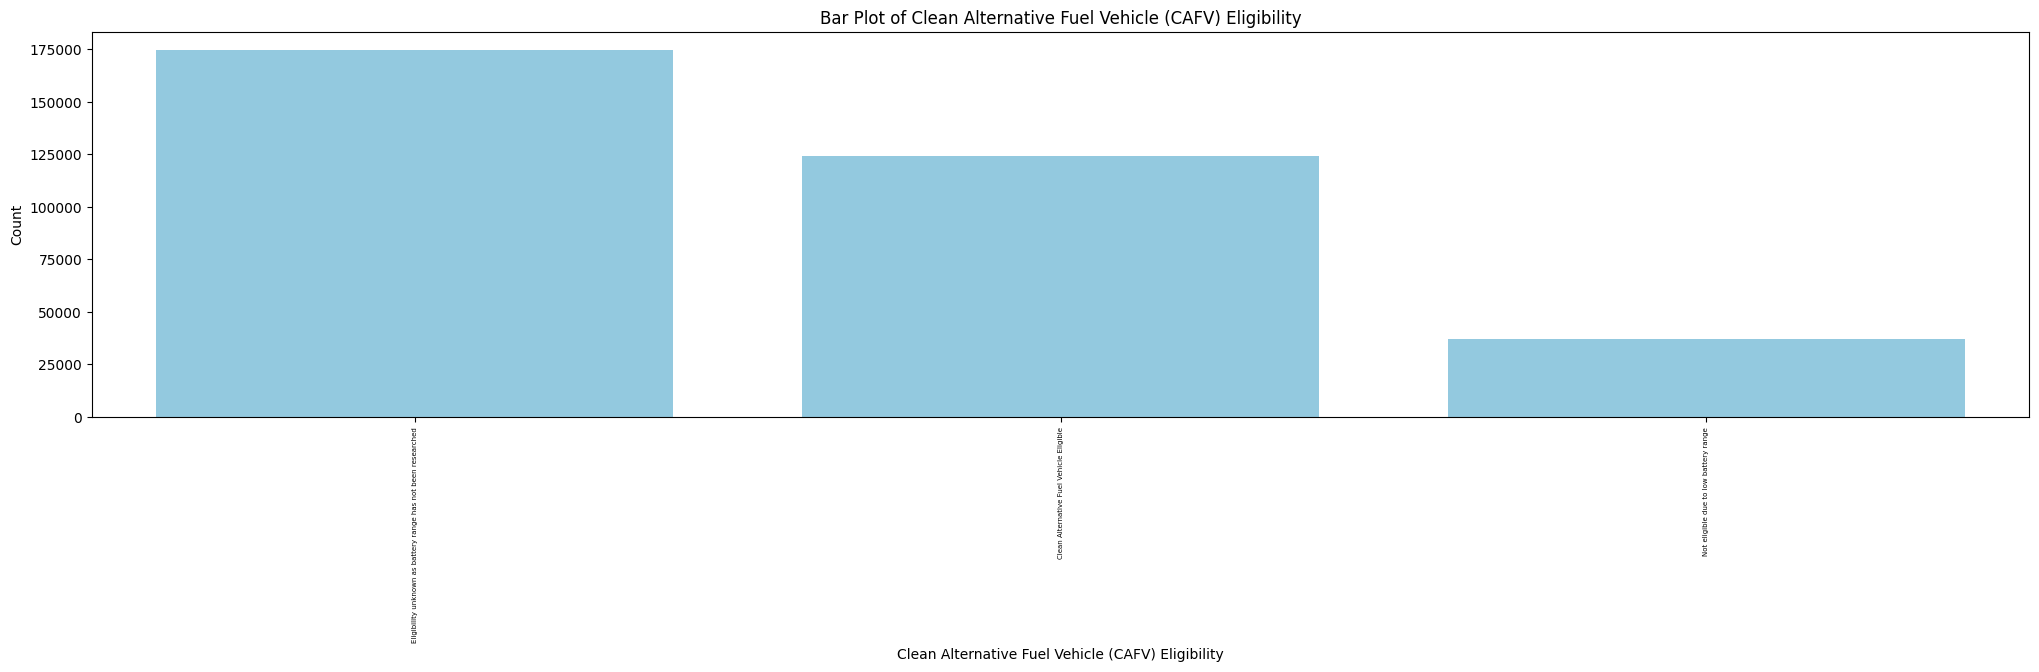


Frequency of values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' (Ascending):
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Not eligible due to low battery range                            37331
Clean Alternative Fuel Vehicle Eligible                         124068
Eligibility unknown as battery range has not been researched    174510
Name: count, dtype: int64

Frequency of values in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' (Descending):
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    174510
Clean Alternative Fuel Vehicle Eligible                         124068
Not eligible due to low battery range                            37331
Name: count, dtype: int64

count                                                335909
unique                                                    3
top       Eligibility unknown as battery range has not b...
freq                                                 174510
Na

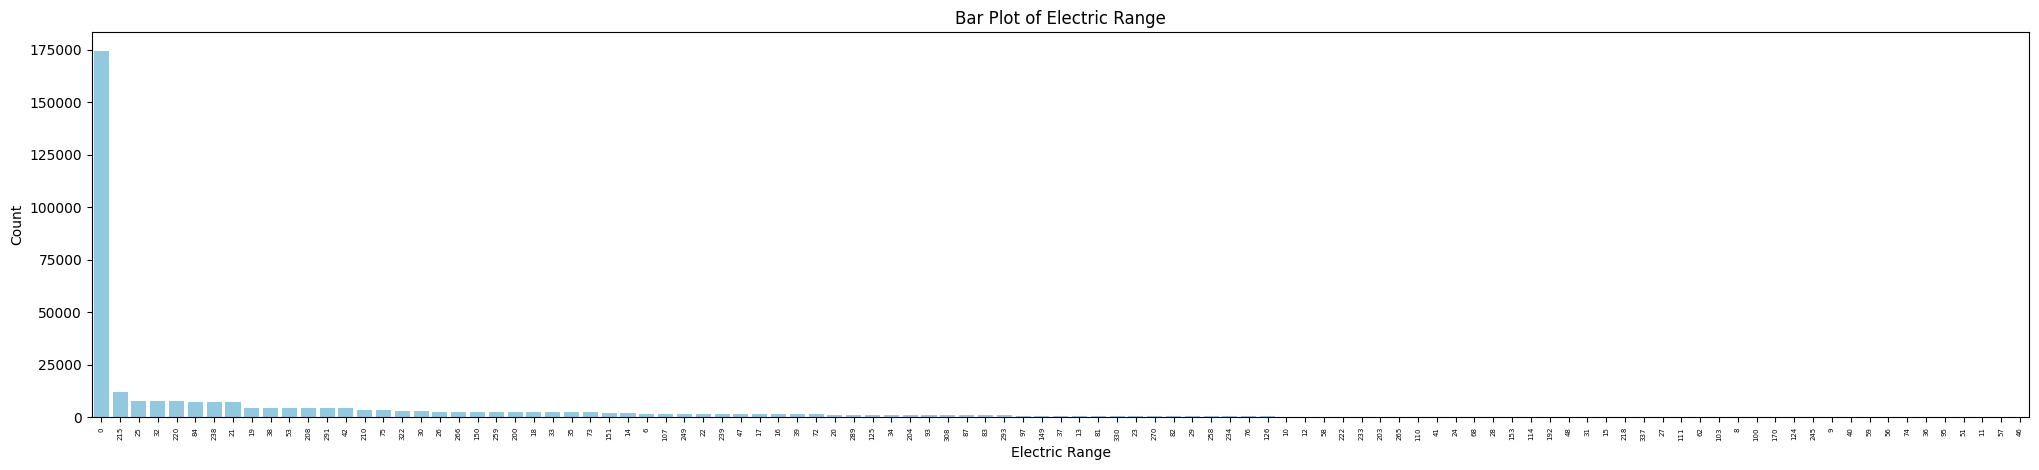


Frequency of values in 'Electric Range' (Ascending):
Electric Range
46          1
57          4
11          4
51          5
95          6
        ...  
220      7587
32       7778
25       7833
215     11848
0      174510
Name: count, Length: 103, dtype: int64

Frequency of values in 'Electric Range' (Descending):
Electric Range
0      174510
215     11848
25       7833
32       7778
220      7587
        ...  
95          6
51          5
11          4
57          4
46          1
Name: count, Length: 103, dtype: int64

count    335909.000000
mean         57.962555
std          91.433440
min           0.000000
25%           0.000000
50%           0.000000
75%          75.000000
max         337.000000
Name: Electric Range, dtype: float64
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: Electric Range
Non-Null Count   Dtype
--------------   -----
335909 non-null  int64
dtypes: int64(1)
memory usage: 5.1 MB
None



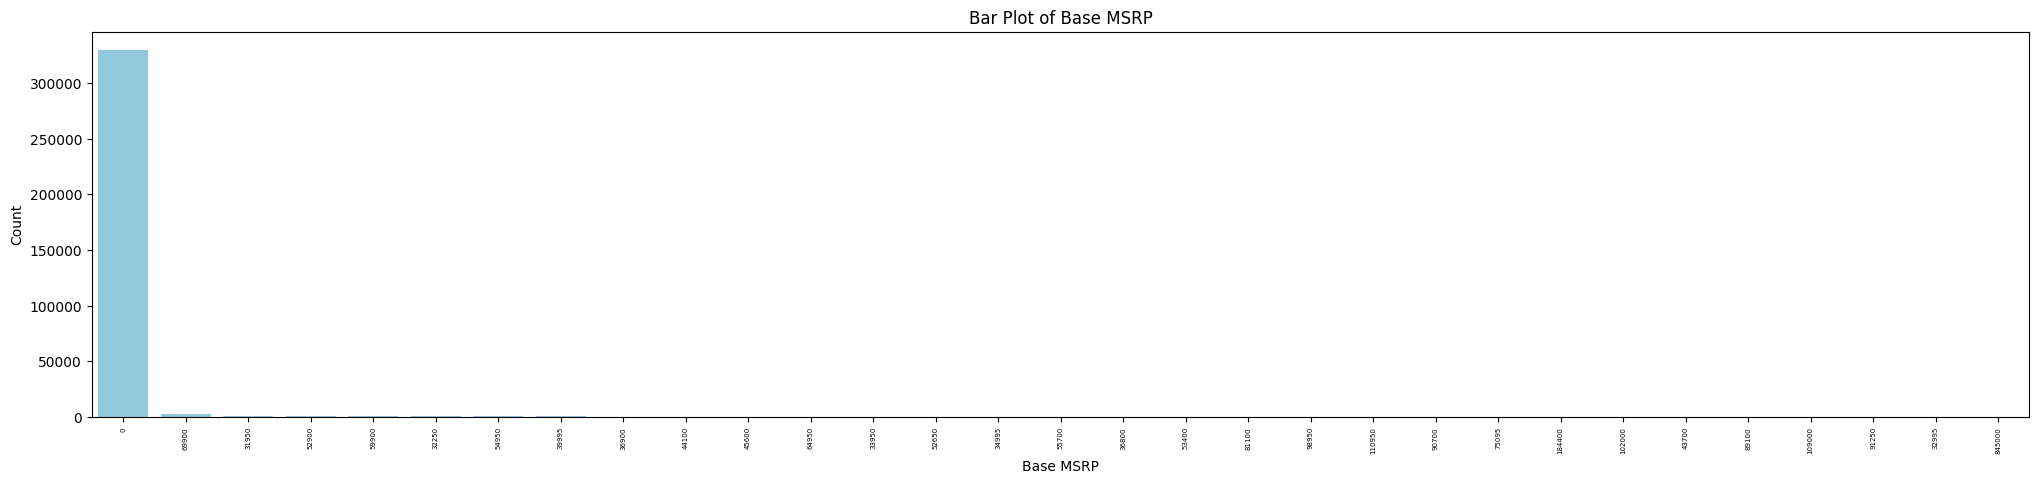


Frequency of values in 'Base MSRP' (Ascending):
Base MSRP
845000         2
32995          7
91250         10
109000        13
89100         16
43700         16
102000        17
184400        19
75095         28
90700         37
110950        40
98950         40
81100         44
53400         74
36800         95
55700         97
34995        121
52650        126
33950        132
64950        150
45600        158
44100        177
36900        197
39995        210
54950        245
32250        247
59900        247
52900        414
31950        708
69900       2502
0         329720
Name: count, dtype: int64

Frequency of values in 'Base MSRP' (Descending):
Base MSRP
0         329720
69900       2502
31950        708
52900        414
59900        247
32250        247
54950        245
39995        210
36900        197
44100        177
45600        158
64950        150
33950        132
52650        126
34995        121
55700         97
36800         95
53400         74
81100         44
98950

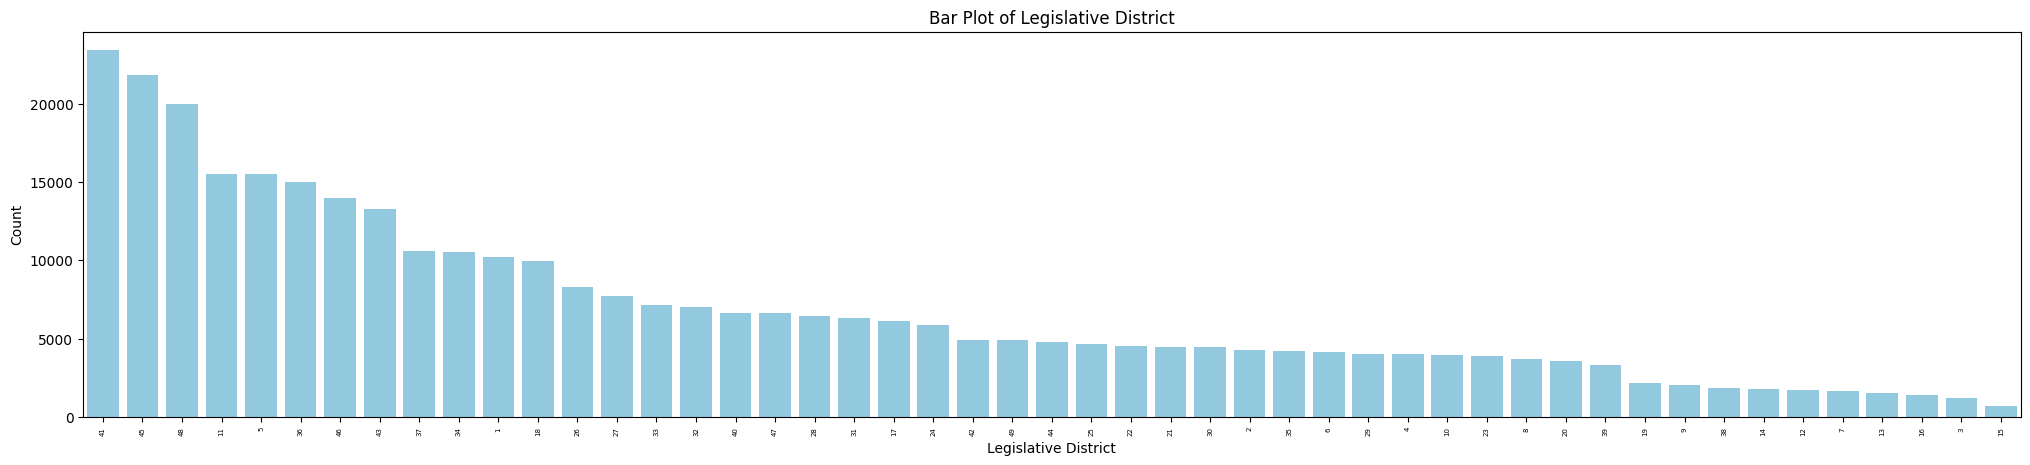


Frequency of values in 'Legislative District' (Ascending):
Legislative District
15      686
3      1226
16     1392
13     1505
7      1670
12     1697
14     1773
38     1807
9      2012
19     2189
39     3308
20     3541
8      3712
23     3902
10     3959
4      3988
29     4039
6      4146
35     4210
2      4294
30     4429
21     4480
22     4511
25     4637
44     4784
49     4891
42     4935
24     5866
17     6126
31     6340
28     6436
47     6612
40     6655
32     7011
33     7132
27     7697
26     8272
18     9960
1     10217
34    10519
37    10626
43    13312
46    14010
36    15029
5     15510
11    15522
48    20006
45    21874
41    23454
Name: count, dtype: int64

Frequency of values in 'Legislative District' (Descending):
Legislative District
41    23454
45    21874
48    20006
11    15522
5     15510
36    15029
46    14010
43    13312
37    10626
34    10519
1     10217
18     9960
26     8272
27     7697
33     7132
32     7011
40     6655
47     6612
28     

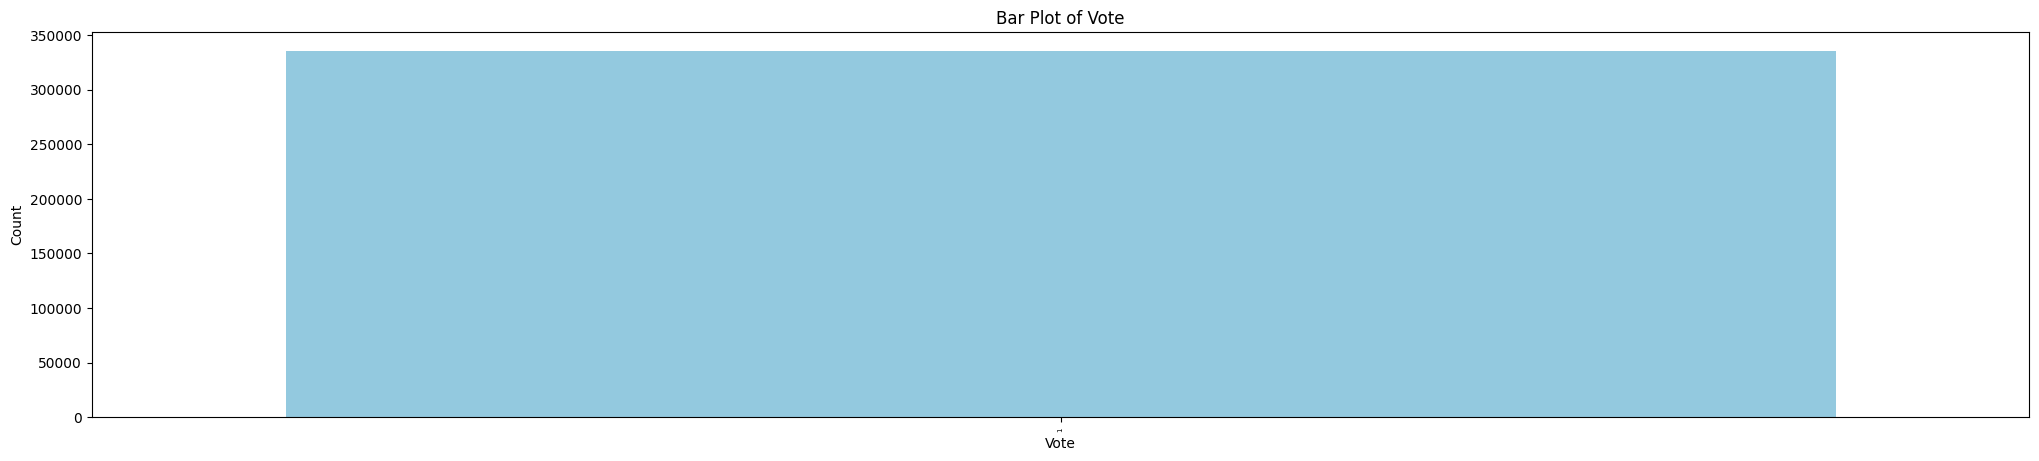


Frequency of values in 'Vote' (Ascending):
Vote
1    335909
Name: count, dtype: int64

Frequency of values in 'Vote' (Descending):
Vote
1    335909
Name: count, dtype: int64

count    335909.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Vote, dtype: float64
<class 'pandas.core.series.Series'>
Index: 335909 entries, 0 to 181457
Series name: Vote
Non-Null Count   Dtype
--------------   -----
335909 non-null  int64
dtypes: int64(1)
memory usage: 5.1 MB
None



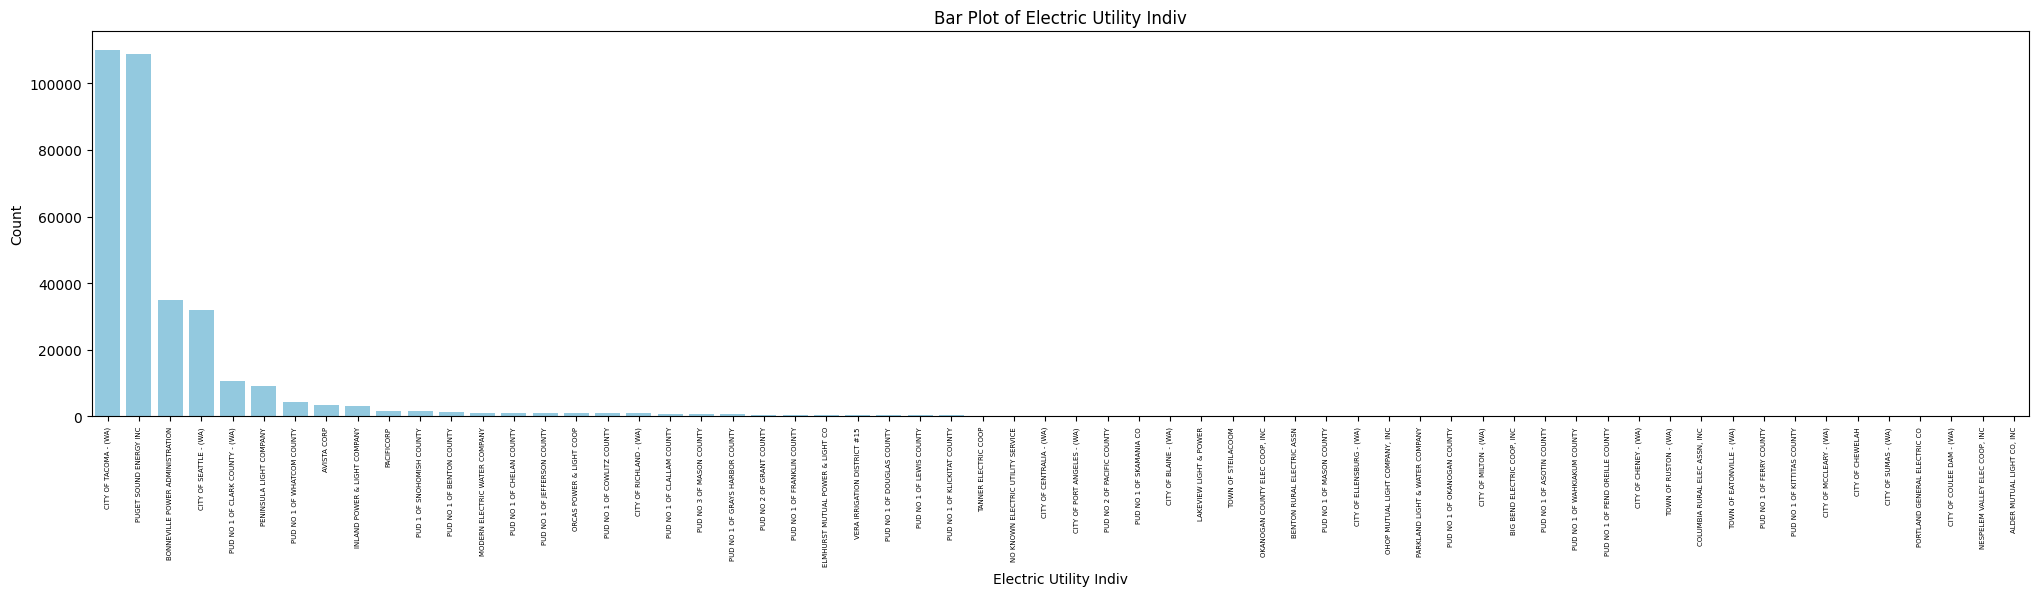


Frequency of values in 'Electric Utility Indiv' (Ascending):
Electric Utility Indiv
ALDER MUTUAL LIGHT CO, INC              2
NESPELEM VALLEY ELEC COOP, INC          4
PORTLAND GENERAL ELECTRIC CO            5
CITY OF COULEE DAM - (WA)               5
CITY OF SUMAS - (WA)                    7
                                    ...  
PUD NO 1 OF CLARK COUNTY - (WA)     10662
CITY OF SEATTLE - (WA)              32013
BONNEVILLE POWER ADMINISTRATION     35003
PUGET SOUND ENERGY INC             108942
CITY OF TACOMA - (WA)              110105
Name: count, Length: 62, dtype: int64

Frequency of values in 'Electric Utility Indiv' (Descending):
Electric Utility Indiv
CITY OF TACOMA - (WA)              110105
PUGET SOUND ENERGY INC             108942
BONNEVILLE POWER ADMINISTRATION     35003
CITY OF SEATTLE - (WA)              32013
PUD NO 1 OF CLARK COUNTY - (WA)     10662
                                    ...  
CITY OF SUMAS - (WA)                    7
PORTLAND GENERAL ELECTRIC CO       

In [ ]:
# 3. Number of Unique Values
unique_counts4 = df4.nunique()
print("Number of unique values per column:")
print(unique_counts4)
print(df4.info())
print(df4.describe(include='all'))

# # 2. Count Graph for Non-Numeric Data (including NA values)
# # for column in df.columns:
for column in df4.columns:
#     # if not pd.api.types.is_numeric_dtype(df2[column]):
#     else:
    plt.figure(figsize=(25, 5))
    # print(column, df2[column].unique().astype(str))
    # Count plot for categorical data including NA values
    df4[column] = df4[column].fillna(pd.NA)
    sns.countplot(x=df4[column], color='skyblue', order=df4[column].value_counts().index)
    # sns.countplot(x=df2[column], color='skyblue', order=sorted(df2[column].unique().astype(str)))
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=5)
    # plt.tight_layout()
    plt.show()

# 4. Frequency Table (Ascending Order) including NA
# 5. Frequency Table (Descending Order) including NA
# for column in df2.columns:
    # if pd.api.types.is_numeric_dtype(df2[column]) or pd.api.types.is_object_dtype(df2[column]):
    frequency_table = df4[column].value_counts(dropna=False).sort_values(ascending=True)
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Ascending):")
    print(frequency_table)
    frequency_table = df4[column].value_counts(dropna=False).sort_values(ascending=False)
    frequency_table.columns = [column, 'Frequency']
    print(f"\nFrequency of values in '{column}' (Descending):")
    print(frequency_table)
    print()
    print(df4[column].describe(include='all'))
    print(df4[column].info())
    print()

In [ ]:
# Save DataFrame to Excel
df2.to_excel('else.xlsx', sheet_name='Sheet1', index=False, engine='openpyxl')
df3.to_excel('WA.xlsx', sheet_name='Sheet1', index=False, engine='openpyxl')